<h1 align="center">EDA ACCIDENTAL DRUG RELATED DEATHS</h1>

<div style="text-align:center">
    <img src = 'https://i.ibb.co/sQRsYMn/Adobe-Stock-409164931-1.jpg'>
</div>

In this Jupyter Notebook, we’ll analyze the data from Drug Related Deaths in Conneticut, to discover sights and behavior patterns of the substances, context and enviroment of the deceacents. Subsequently, from the data that will be cleaned, we can use a machine learning model to classify the installations with common features.

### IMPORTING LIBRARIES

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import warnings

### DEFINING VISUALIZATION VALUES

Next, let’s define the values that will affect the visualization options:

In [3]:
pd.set_option('display.max_columns', None)

Mute the warnings in the output:

In [4]:
warnings.filterwarnings("ignore")

Set the seaborn styles for the plots:

In [5]:
sns.set_style("darkgrid")
colors_arbitrary = sns.color_palette("Set2",2)
colors_arbitrary_1 = sns.color_palette("Paired")

Let's read the data:

In [6]:
project_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
data_dir = os.path.join(project_dir, "data", "raw")
os.makedirs(data_dir, exist_ok=True)

output_path = os.path.join(data_dir,'df_filtered.csv')
df=pd.read_csv(output_path)
df.head(5)

,Date Type,Age,Sex,Race,Ethnicity,Residence City,Residence County,Residence State,Injury City,Injury County,Injury State,Injury Place,Description of Injury,Death City,Death County,Location,Other Significant Conditions,Heroin,Cocaine,Fentanyl,Oxycodone,Oxymorphone,Ethanol,Hydrocodone,Benzodiazepine,Methadone,Meth/Amphetamine,Amphet,Tramad,Hydromorphone,Morphine (Not Heroin),Xylazine,Gabapentin,Opiate NOS,Heroin/Morph/Codeine,Year,Month,Day,Resid_City_Coord_Lat,Resid_City_Coord_Lon,Injury_City_Coord_Lat,Injury_City_Coord_Lon,Death_City_Coord_Lat,Death_City_Coord_Lon
0,Date of death,37.0,Male,Black,Unknown,STAMFORD,FAIRFIELD,UNKNOWN,STAMFORD,UNKNOWN,CT,"House, Apartment, Residence or Decedent’s Home",Cocaine Use and Combined with other Substances,UNKNOWN,UNKNOWN,"House, Apartment, Residence or Decedent’s Home",Unknown,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,2012.0,5.0,29.0,41.051924,-73.539475,41.051924,-73.539475,41.575155,-72.738288
1,Date of death,37.0,Male,White,Unknown,NORWICH,NEW LONDON,UNKNOWN,NORWICH,UNKNOWN,CT,"House, Apartment, Residence or Decedent’s Home","Drug, Substance Use/Abuse Undefined",NORWICH,NEW LONDON,"Hospital, Health Care Facility",Unknown,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,2012.0,6.0,27.0,41.524304,-72.075821,41.524304,-72.075821,41.524304,-72.075821
2,Date of death,28.0,Male,White,Unknown,HEBRON,UNKNOWN,UNKNOWN,HEBRON,UNKNOWN,CT,"House, Apartment, Residence or Decedent’s Home","Drug, Substance Use/Abuse Undefined",MARLBOROUGH,UNKNOWN,"Hospital, Health Care Facility",Unknown,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,2014.0,3.0,24.0,41.658069,-72.366324,41.658069,-72.366324,41.632043,-72.461309
3,Date of death,26.0,Female,White,Unknown,BALTIC,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,Other or Unknown,Unknown,BALTIC,NEW LONDON,"House, Apartment, Residence or Decedent’s Home",Unknown,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,2014.0,12.0,31.0,41.617221,-72.085031,41.575155,-72.738288,41.617221,-72.085031
4,Date of death,41.0,Male,White,Unknown,SHELTON,FAIRFIELD,CT,SHELTON,UNKNOWN,UNKNOWN,"House, Apartment, Residence or Decedent’s Home","Drug, Substance Use/Abuse Undefined",BRIDGEPORT,UNKNOWN,"Hospital, Health Care Facility",Unknown,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,2016.0,1.0,16.0,41.316843,-73.092968,41.316843,-73.092968,41.179195,-73.189476


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11981 entries, 0 to 11980
Data columns (total 44 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Date Type                      11981 non-null  object 
 1   Age                            11979 non-null  float64
 2   Sex                            11981 non-null  object 
 3   Race                           11981 non-null  object 
 4   Ethnicity                      11981 non-null  object 
 5   Residence City                 11981 non-null  object 
 6   Residence County               11981 non-null  object 
 7   Residence State                11981 non-null  object 
 8   Injury City                    11981 non-null  object 
 9   Injury County                  11981 non-null  object 
 10  Injury State                   11981 non-null  object 
 11  Injury Place                   11981 non-null  object 
 12  Description of Injury          11981 non-null 

In [8]:
df.shape

(11981, 44)

### STADISTICAL ANALYSIS

Let’s see some statistical data from non-categorical and categorical variables.

In [9]:
df.describe()

,Age,Year,Month,Day,Resid_City_Coord_Lat,Resid_City_Coord_Lon,Injury_City_Coord_Lat,Injury_City_Coord_Lon,Death_City_Coord_Lat,Death_City_Coord_Lon
count,11979.000000,11981.000000,11981.000000,11981.000000,11814.000000,11814.000000,11724.000000,11724.000000,11980.000000,11980.000000
mean,44.011186,2018.758868,6.601452,15.316501,41.504935,-72.857592,41.524212,-72.809472,41.537562,-72.793020
std,12.678870,3.100223,3.413001,8.922135,0.524365,1.179251,0.231460,0.375798,0.205601,0.334436
min,13.000000,2012.000000,1.000000,1.000000,26.010670,-122.342930,41.001420,-73.665950,41.026526,-73.628549
25%,34.000000,2016.000000,4.000000,7.000000,41.316843,-73.056564,41.308252,-73.056564,41.355167,-73.043069
50%,44.000000,2019.000000,7.000000,15.000000,41.554261,-72.824947,41.554261,-72.860826,41.573503,-72.738306
75%,54.000000,2021.000000,10.000000,23.000000,41.707618,-72.651713,41.713028,-72.651713,41.673037,-72.673356
max,87.000000,2023.000000,12.000000,31.000000,44.877396,-68.770770,42.043230,-71.808899,42.025992,-71.808899


No significant findings

In [10]:
df.describe(include=object)

,Date Type,Sex,Race,Ethnicity,Residence City,Residence County,Residence State,Injury City,Injury County,Injury State,Injury Place,Description of Injury,Death City,Death County,Location,Other Significant Conditions,Heroin,Cocaine,Fentanyl,Oxycodone,Oxymorphone,Ethanol,Hydrocodone,Benzodiazepine,Methadone,Meth/Amphetamine,Amphet,Tramad,Hydromorphone,Morphine (Not Heroin),Xylazine,Gabapentin,Opiate NOS,Heroin/Morph/Codeine
count,11981,11981,11981,11981,11981,11981,11981,11981,11981,11981,11981,11981,11981,11981,11981,11981,11981,11981,11981,11981,11981,11981,11981,11981,11981,11981,11981,11981,11981,11981,11981,11981,11981,11981
unique,2,3,6,6,523,163,36,280,18,4,40,24,230,10,16,18,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
top,Date of death,Male,White,Unknown,HARTFORD,NEW HAVEN,CT,HARTFORD,UNKNOWN,CT,"House, Apartment, Residence or Decedent’s Home","Drug, Substance Use/Abuse Undefined",UNKNOWN,UNKNOWN,"House, Apartment, Residence or Decedent’s Home",Unknown,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N
freq,10214,8887,10082,9433,830,3145,9661,1099,3345,8920,8533,9363,2785,3892,5598,10782,8403,7403,8061,10965,11819,8780,11812,9264,10903,11854,11550,11679,11904,11922,10903,11512,8868,9779


Drug addiction primarily affects white males, occurring in their residences, with Fentanyl and Opiates being the predominant substances

### DATA VISUALIZATION

Let’s explore some graphical representations of the values in order to discover insights:

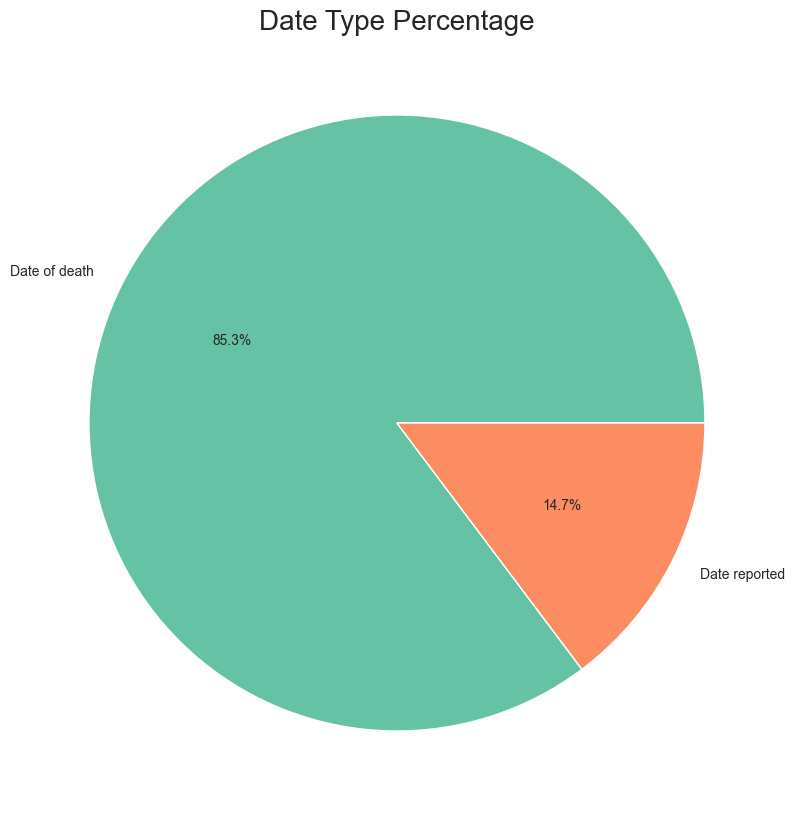

In [11]:
plt.figure(figsize=(10,10))

plt.pie(data=df, x = df["Date Type"].value_counts(), labels = df["Date Type"].unique(), autopct='%1.1f%%', colors=colors_arbitrary)

plt.title("Date Type Percentage", fontsize=20)

plt.show()

Later, we should study the difference between 'Date of Death' and 'Date Reported' and analyze if there are differences to identify their causes. If these differences are minimal, we can drop this column.

#### AGE OF DEATH DISTRIBUTION

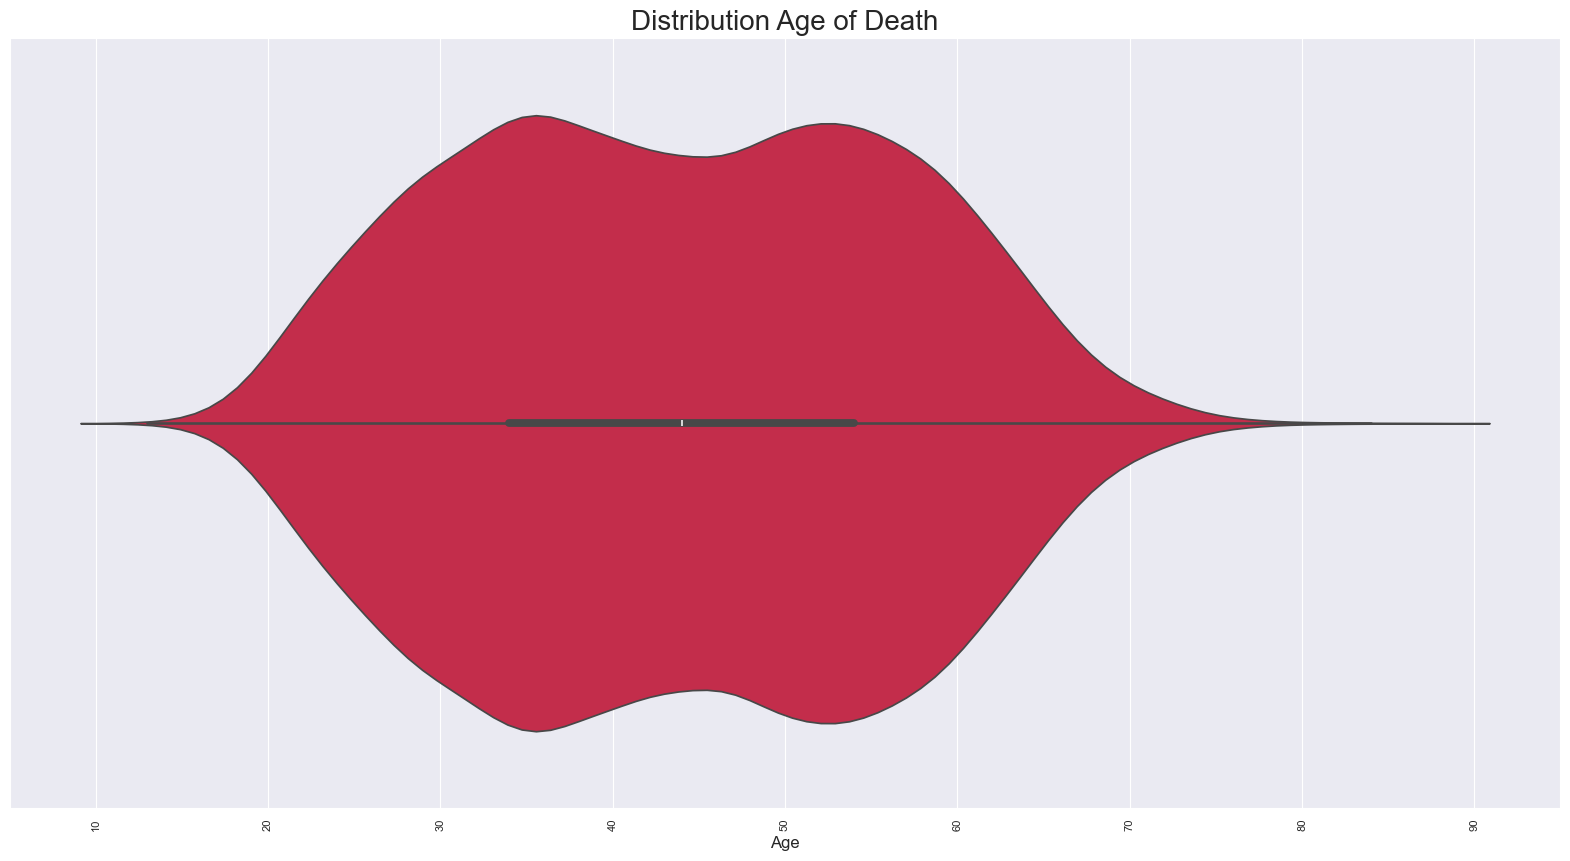

In [12]:
plt.figure(figsize=(20,10))

df_sort_age = df.sort_values(by='Age')

sns.violinplot(df_sort_age, x="Age", color="crimson")
plt.title("Distribution Age of Death", fontsize=20)
plt.xlabel("Age", fontsize=12, )
plt.xticks(rotation=90, fontsize=8)
plt.yticks(fontsize=8)

plt.show()

This graphic shows more clearly the ages with highest frequency. It also shows that the 30s is a dangerous decade for drug users, possibly because this age marks the culmination of addiction patterns mentioned previously and the consequences of poor decisions become evident. For those in their 50s, we will shortly evaluate health conditions.

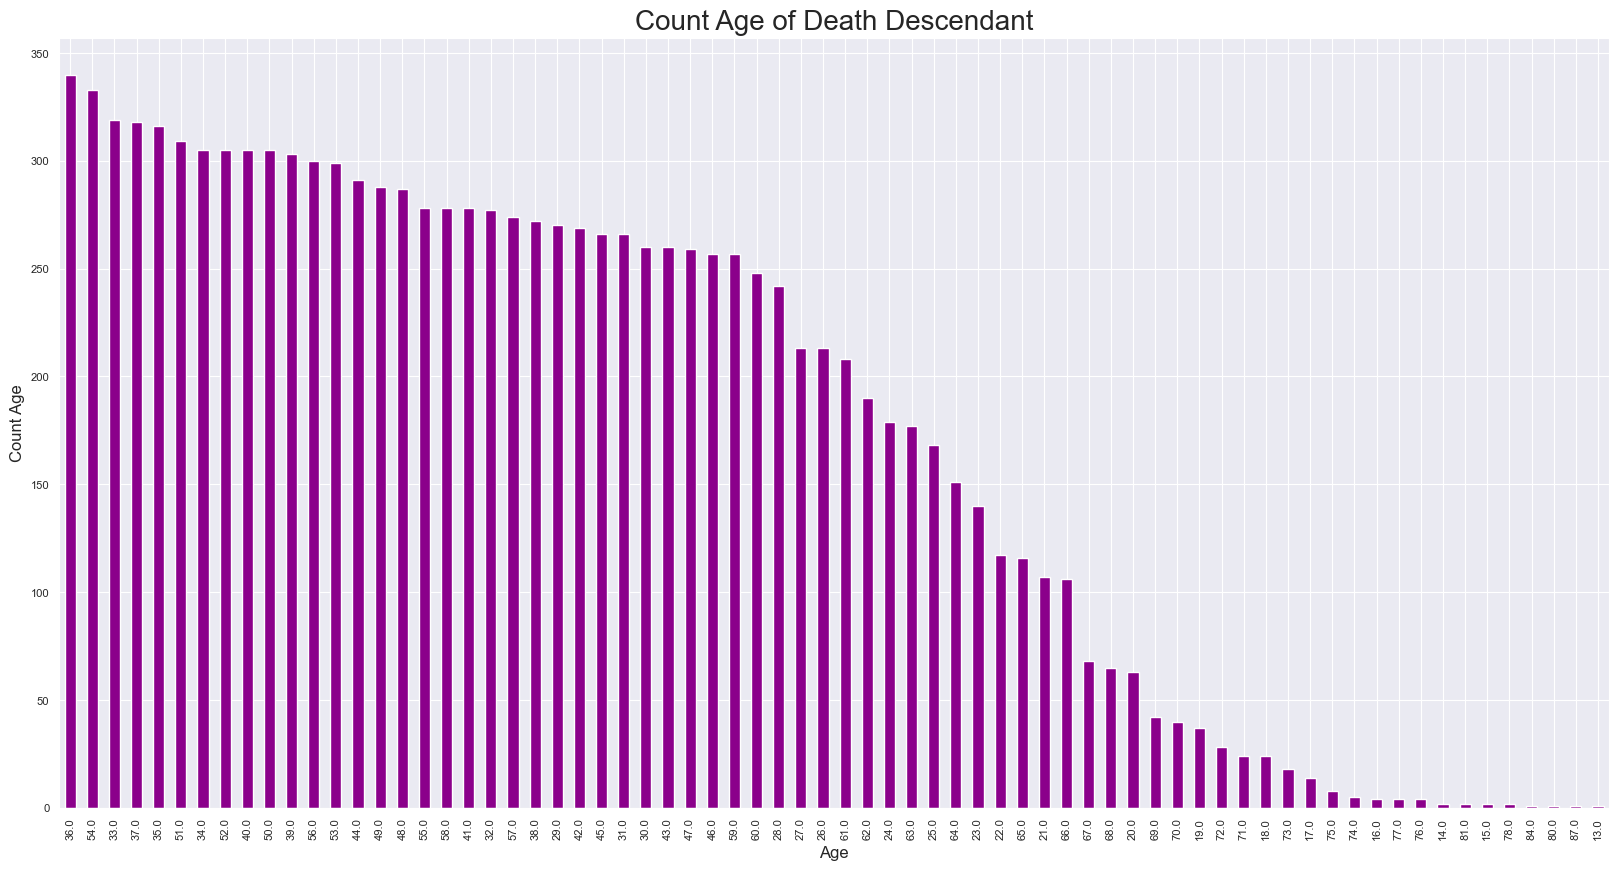

In [13]:
plt.figure(figsize=(20,10))

df['Age'].value_counts().plot(kind='bar', color="darkmagenta")

plt.title("Count Age of Death Descendant", fontsize=20)
plt.xlabel("Age", fontsize=12, )
plt.ylabel("Count Age", fontsize=12)
plt.xticks(rotation=90, fontsize=8)
plt.yticks(fontsize=8)

plt.show()

It appears to be a bimodal distribution (and lips), with peaks at ages 36 and 54. The first peak likely represents the culmination of drug addiction, while the second might be related to health issues.

#### AGE OF DEATH DISTRIBUTION

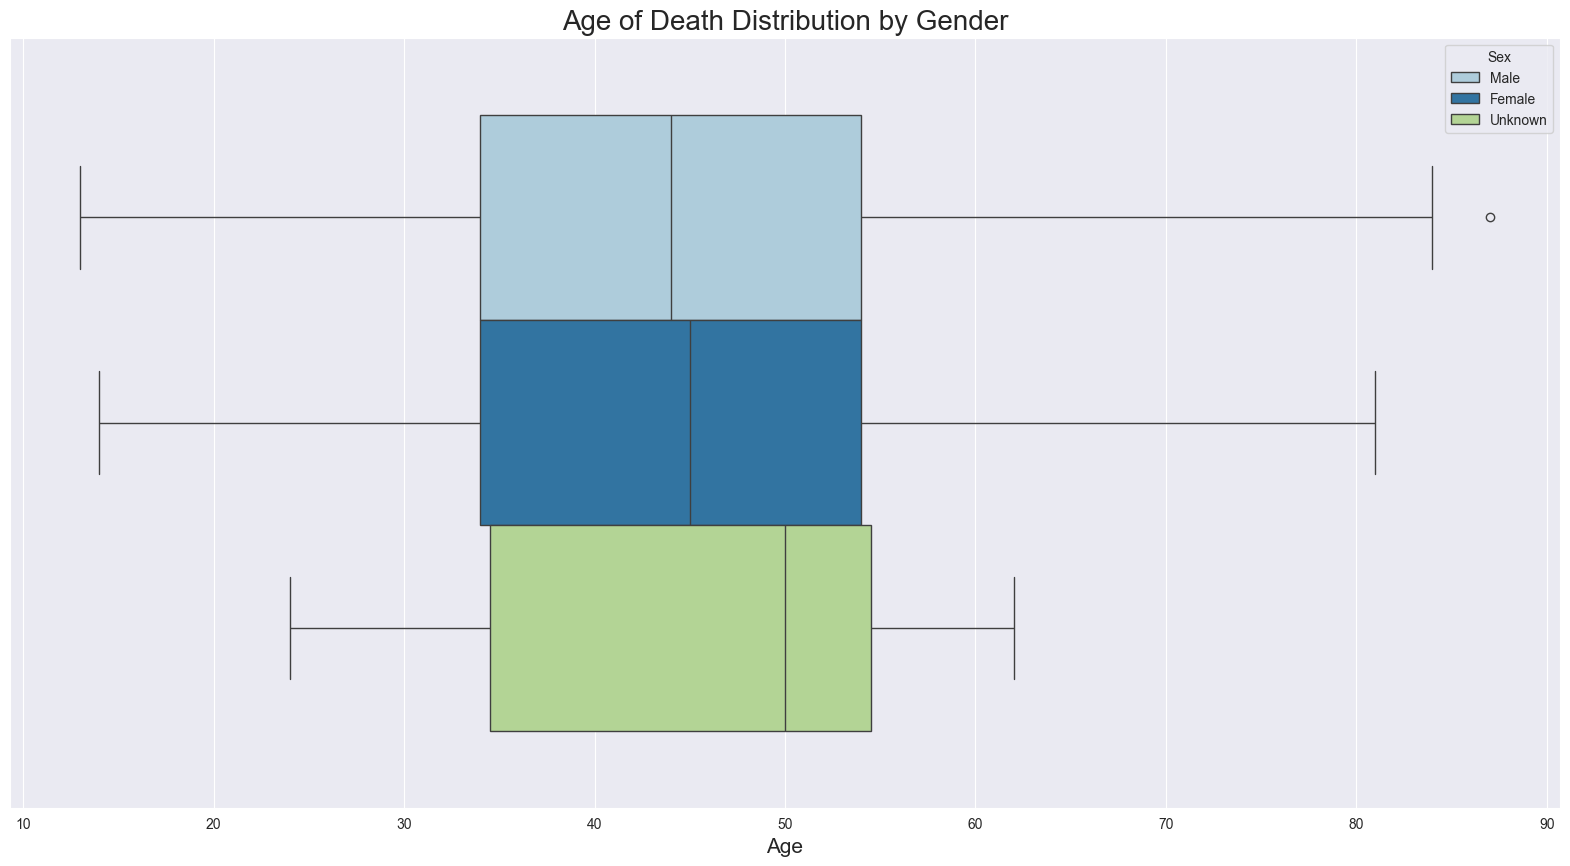

In [14]:
plt.figure(figsize=(20,10))

sns.boxplot(data=df, x= "Age", hue='Sex' , palette=colors_arbitrary_1)
plt.title("Age of Death Distribution by Gender", fontsize=20)

plt.xlabel("Age", fontsize=15)
plt.xticks(fontsize=10)

plt.show()

It confirms that most accidental deaths occur around age 44, between 35 and 54. We can also see deaths among pre-adolescents and the elderly, with a higher tendency toward the latter. The distribution is similar for both genders (including those of unknown gender), with the mean age being one or two years later. There is a population of unknown gender with deaths occurring at age 50.

Practically, there are no outliers in the Age values.

#### RACE COUNT BY SEX

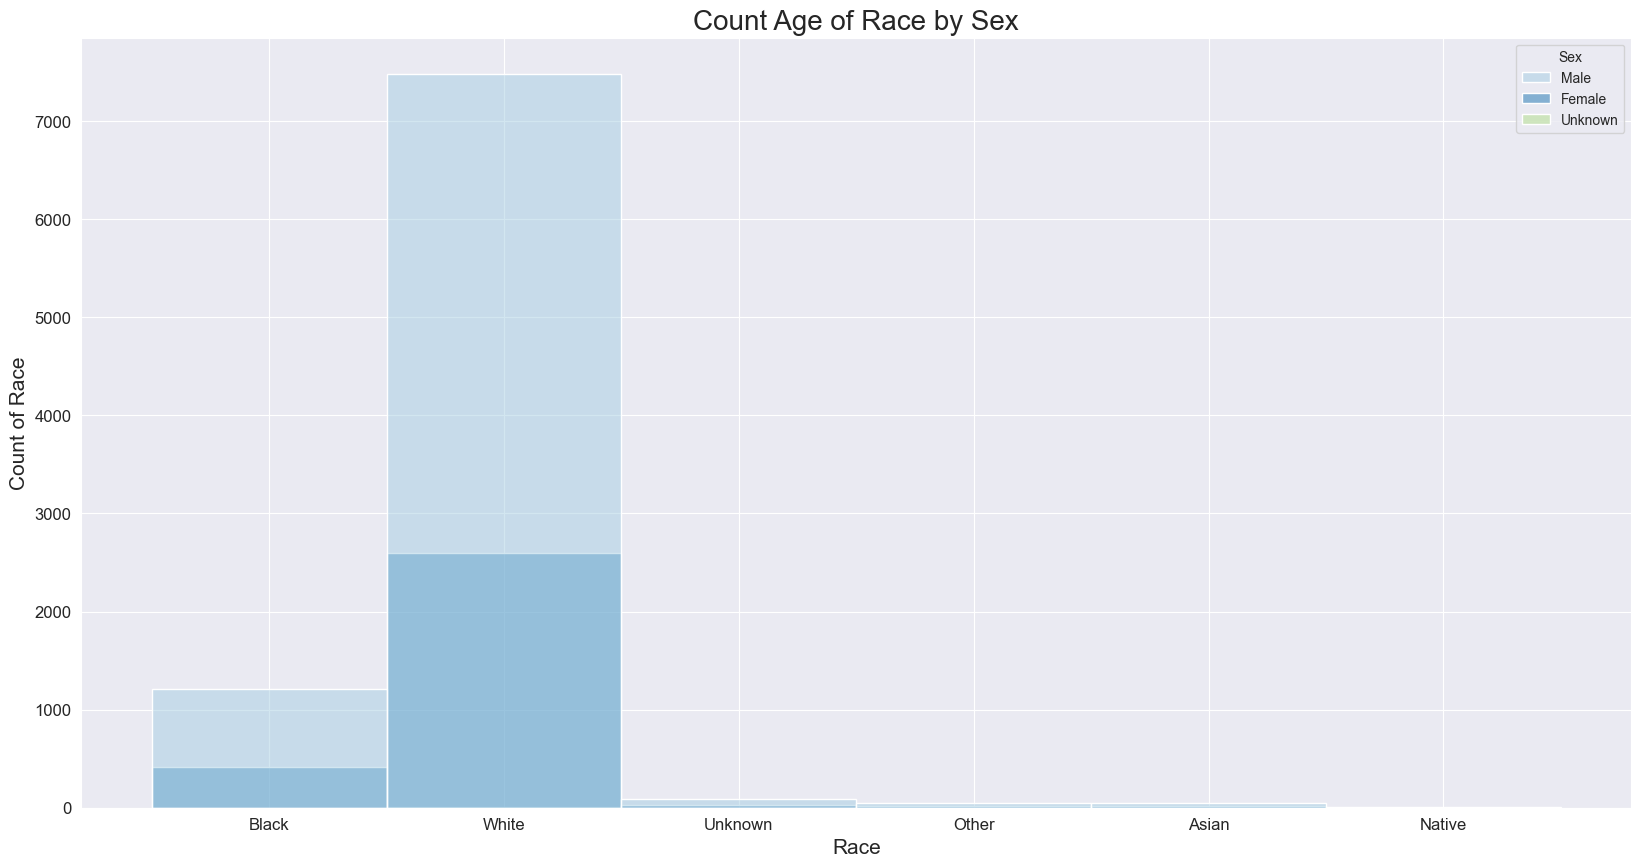

In [15]:
plt.figure(figsize=(20,10))

sns.histplot(data=df, x= "Race", palette= colors_arbitrary_1, hue='Sex')
plt.title("Count Age of Race by Sex", fontsize=20)

plt.xlabel("Race", fontsize=15)
plt.ylabel("Count of Race", fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

In [16]:
df[df['Sex']== 'Male']['Sex'].count()/df[df['Sex']== 'Female']['Sex'].count()*100

288.3517196625568

Drug addiction predominantly affects white males, with them being affected 288% more than females overall. This contradicts media portrayals, as this represents a vulnerable population, not a privileged one. This column doesn't add value to our study, we can drop this column later

#### ETHNICITY COUNT

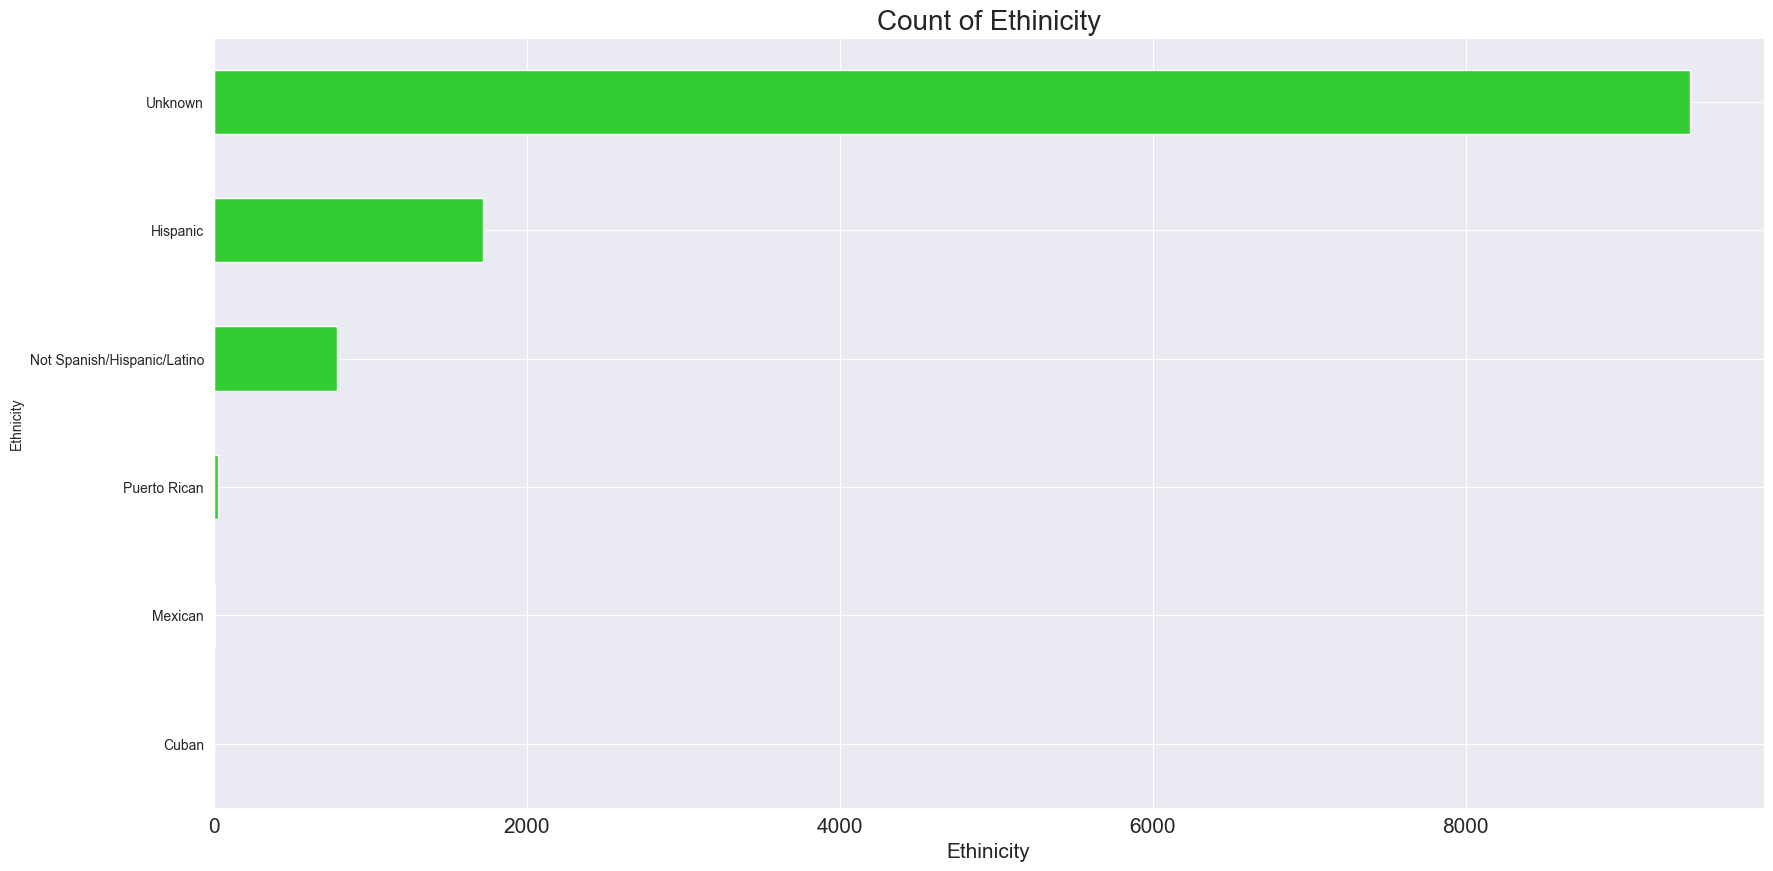

In [17]:
plt.figure(figsize=(20,10))

df['Ethnicity'].value_counts().sort_values(ascending=True).plot(kind='barh', color = 'limegreen')

plt.title("Count of Ethinicity", fontsize=20)
plt.xlabel("Ethinicity", fontsize=15)
plt.xticks(fontsize=15)

plt.show()


There is a significant number of unknown records. Since this doesn't add value to our study, we can drop this column later

#### RESIDENCE CITY VS INJURY CITY VS DEATH CITY

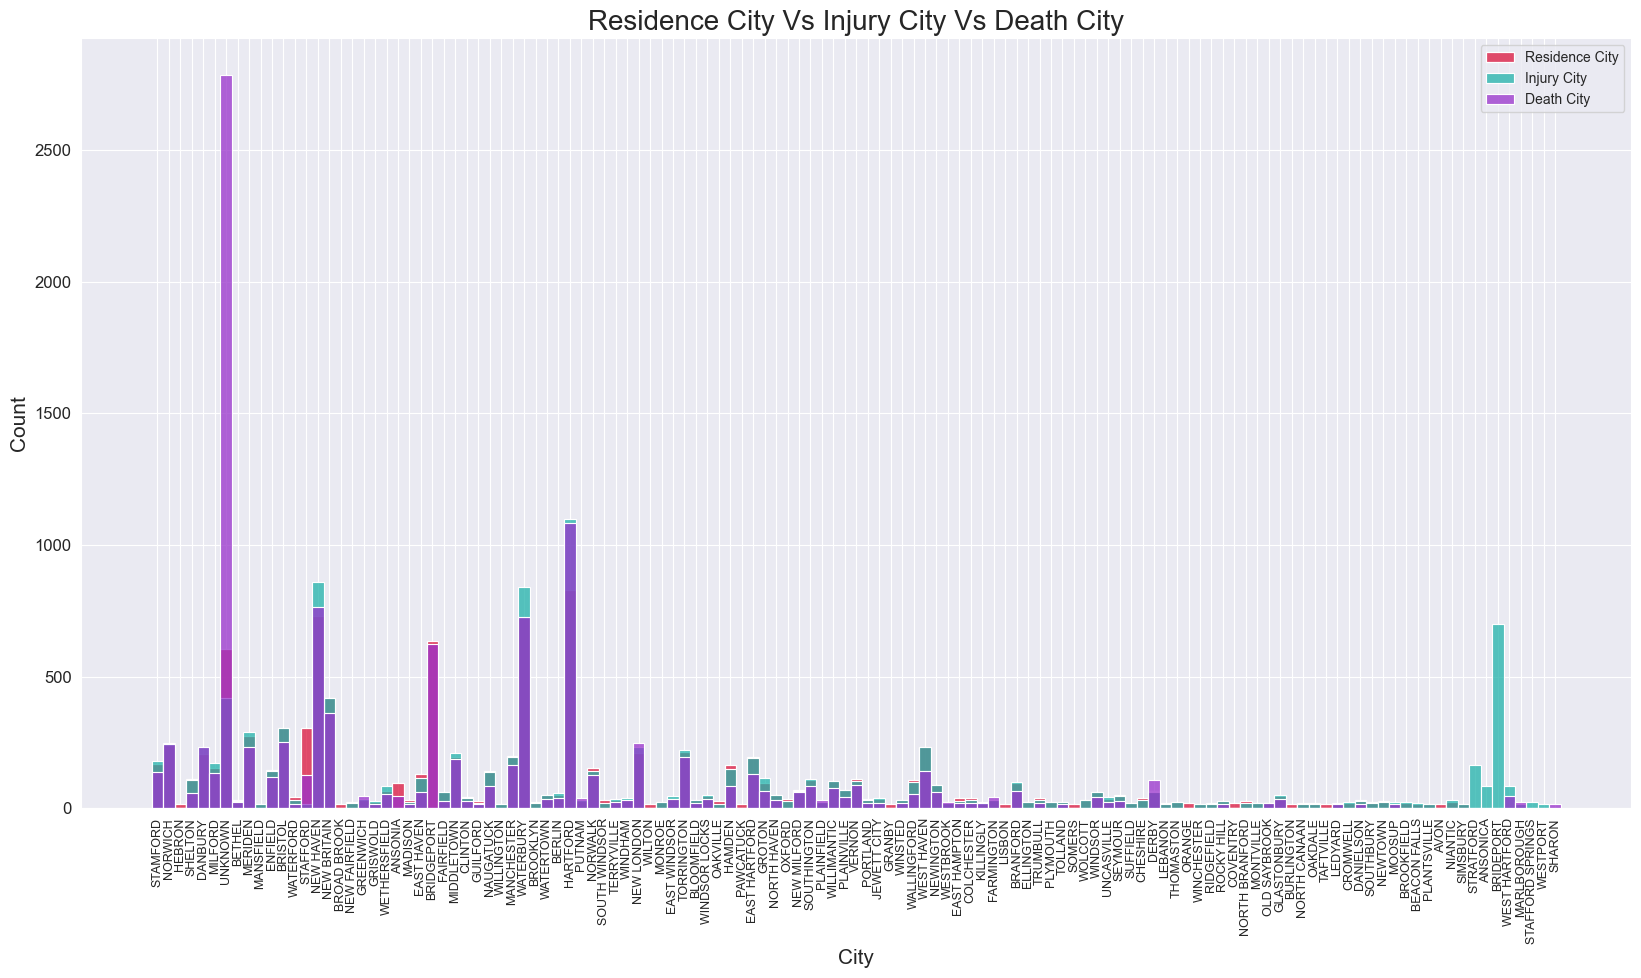

In [18]:
plt.figure(figsize=(20, 10))

city_columns = {'Residence City':'crimson', 'Injury City':'lightseagreen', 'Death City':'darkorchid'}

for col in city_columns:
    city_counts = df[col].value_counts()
    cities_ge_20 = city_counts[city_counts >= 15].index
    sns.histplot(data=df[df[col].isin(cities_ge_20)], x=col, kde=False, label=col, color=city_columns[col])

plt.title('Residence City Vs Injury City Vs Death City', fontsize=20)
plt.xlabel('City', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.xticks(rotation=90, fontsize=9)
plt.yticks(fontsize=12)
plt.legend()
plt.show()

First, there is a wide variety of residence cities, which isn't meaningful. Second, Bridgeport has the highest number of injury records because it's the most populous city in Connecticut, and deaths are occurring in Hartford, New Haven, and Bridgeport due to their concentration of hospitals and medical institutions.Death City column doesn't add value to our study, we can drop this column later

#### RESIDENCE COUNTY VS INJURY COUNTY VS DEATH COUNTY

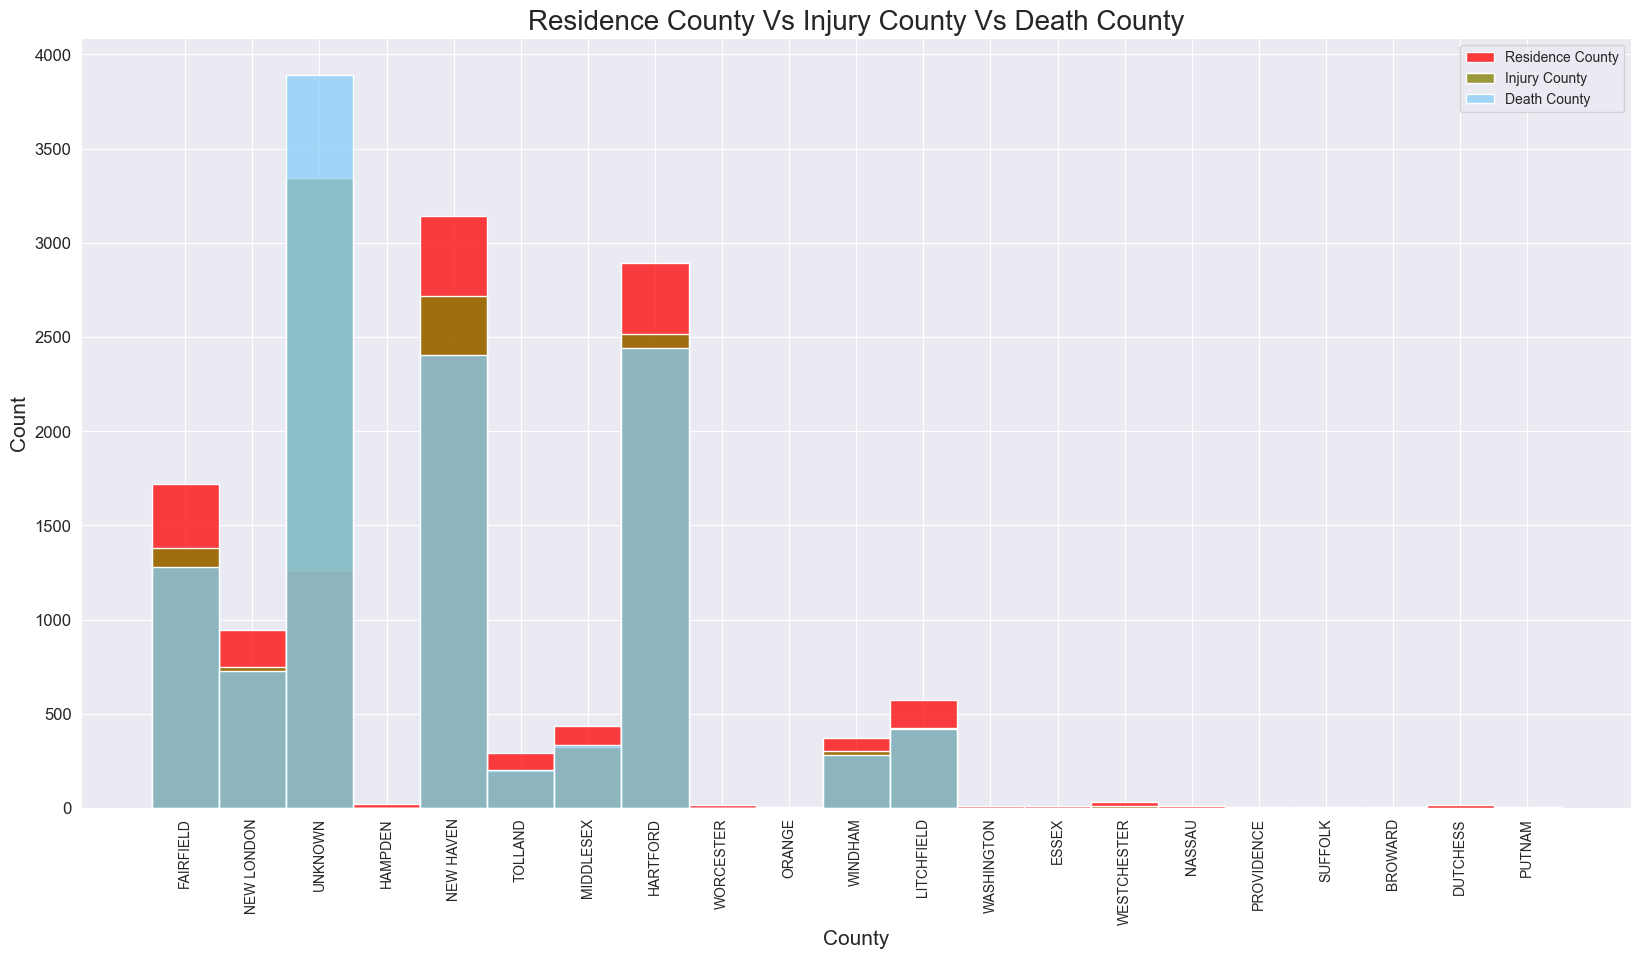

In [19]:
plt.figure(figsize=(20, 10))

county_columns = {'Residence County':'r', 'Injury County':'olive', 'Death County':'lightskyblue'}

for col in county_columns:
    county_counts = df[col].value_counts()
    county_ge_6 = county_counts[county_counts >= 6].index
    sns.histplot(data=df[df[col].isin(county_ge_6)], x=col, kde=False, label=col, color=county_columns[col])

plt.title('Residence County Vs Injury County Vs Death County', fontsize=20)
plt.xlabel('County', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=12)
plt.legend()
plt.show()

First, the residence county differs slightly from injury and death county, but nothing significant to note. Third, injury count and death county maintain almost the same values, likely because the deaths occurred quickly.

#### RESIDENCE STATE VS INJURY STATE

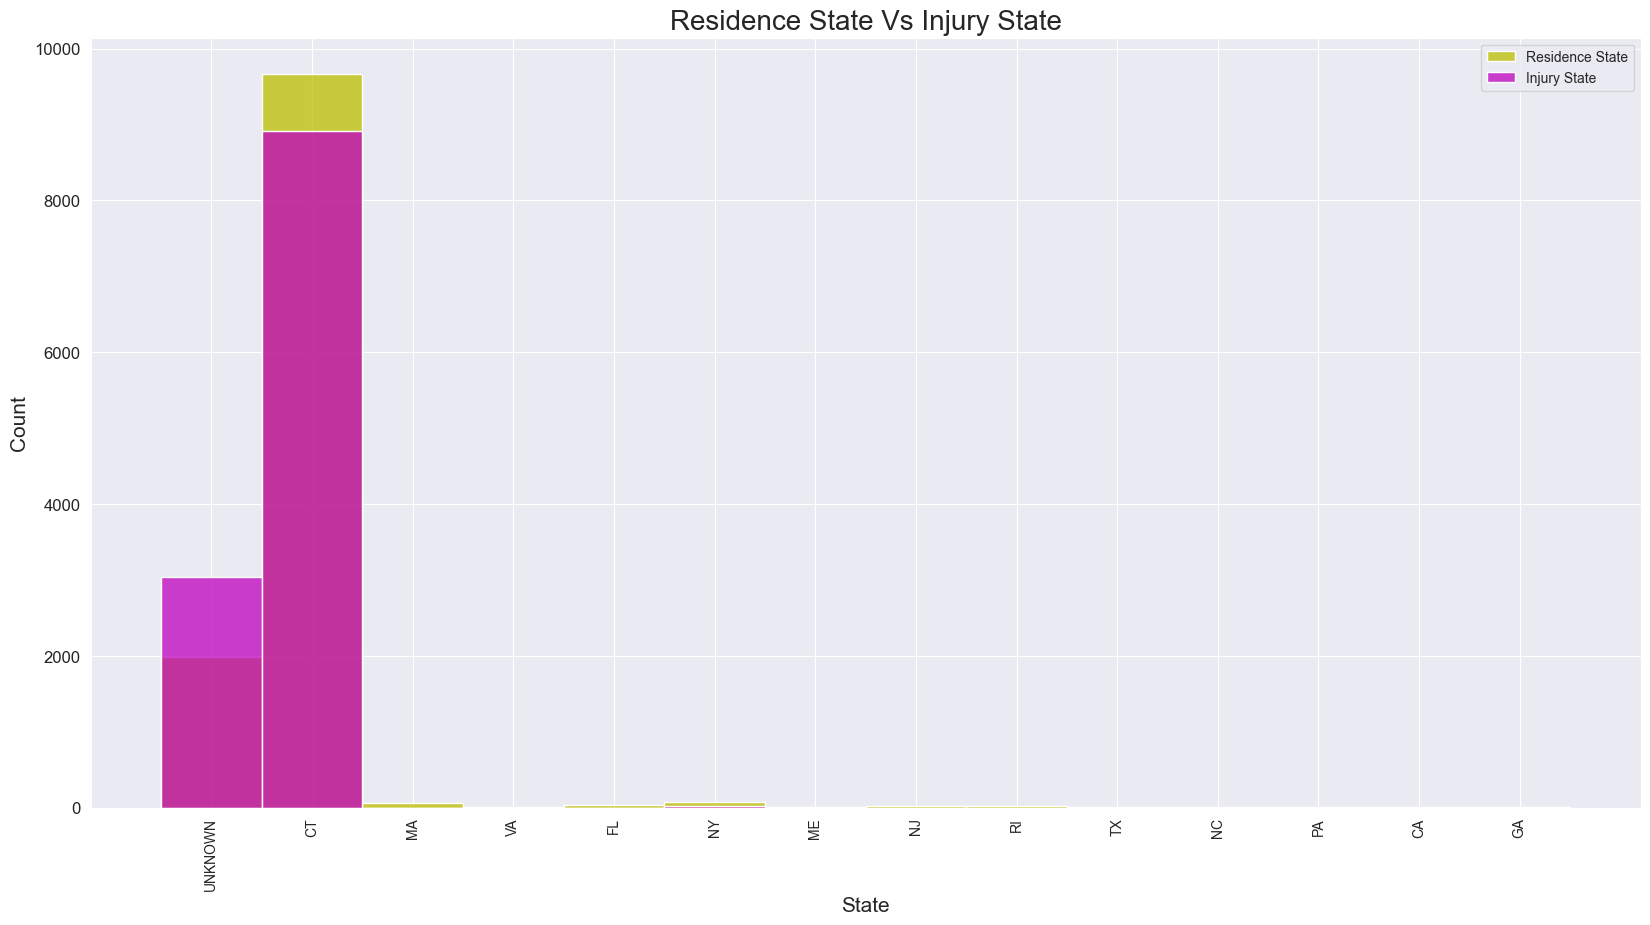

In [20]:
plt.figure(figsize=(20, 10))

state_columns = {'Residence State':'y', 'Injury State':'m'}

for col in state_columns:
    state_counts = df[col].value_counts()
    states_ge_6 = state_counts[state_counts >= 6].index
    sns.histplot(data=df[df[col].isin(states_ge_6)], x=col, kde=False, label=col, color=state_columns[col])

plt.title('Residence State Vs Injury State', fontsize=20)
plt.xlabel('State', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=12)
plt.legend()
plt.show()

Almost all records are in Connecticut and unknown, so we can drop the columns 'Residence State' and 'Injury State' later.

#### COUNT DESCRIPTION OF INJURY

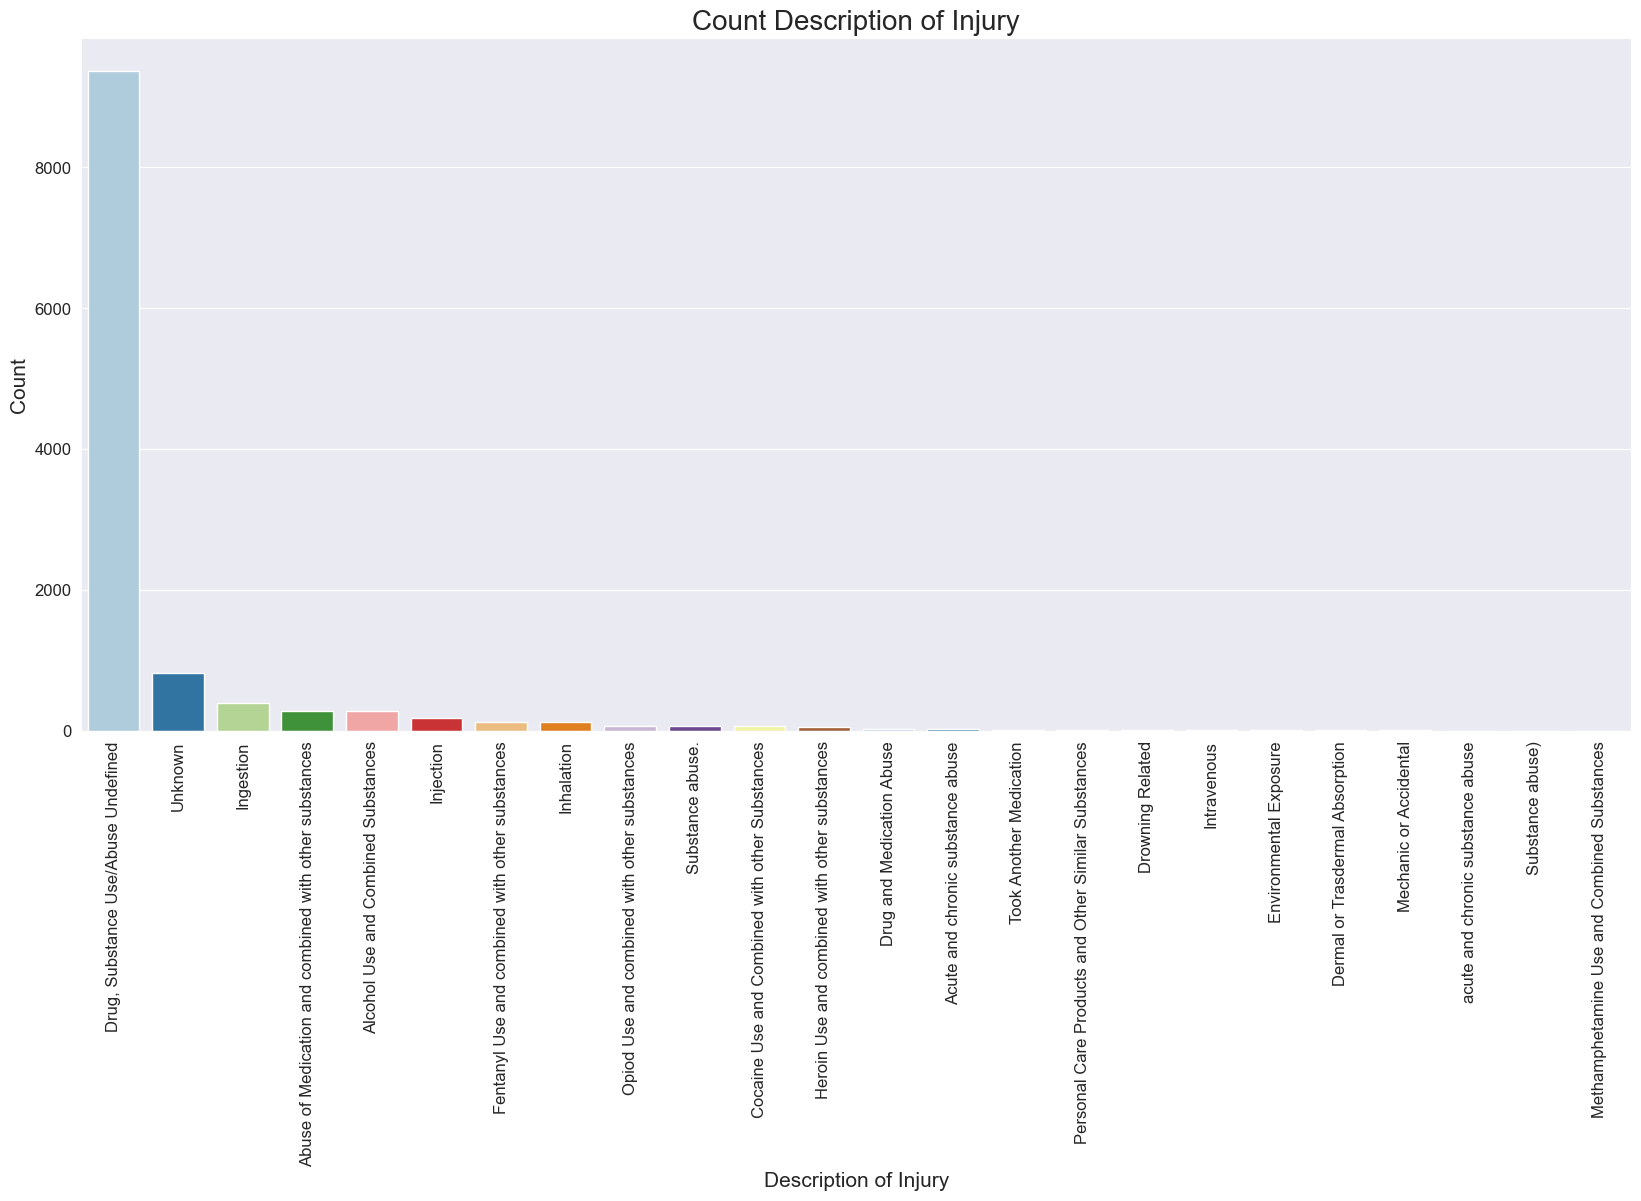

In [21]:
plt.figure(figsize=(20,9))

sns.countplot(data=df, x= "Description of Injury", palette= colors_arbitrary_1, order=df['Description of Injury'].value_counts().index)
plt.title("Count Description of Injury", fontsize=20)

plt.xlabel("Description of Injury", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.xticks(fontsize=12, rotation = 90)
plt.yticks(fontsize=12)

plt.show()

'Drug Substance Use/Abuse Undefined' has a significant number of records, and it's disappointing because it doesn't specify what substance was consumed. Even if we review the Data Wrangling notebook, it's not clear. This column could be dropped later and we'll use other columns to expand information.

#### DESCRIPTION OF INJURY VS OTHER SIGNIFICANT CONDITIONS

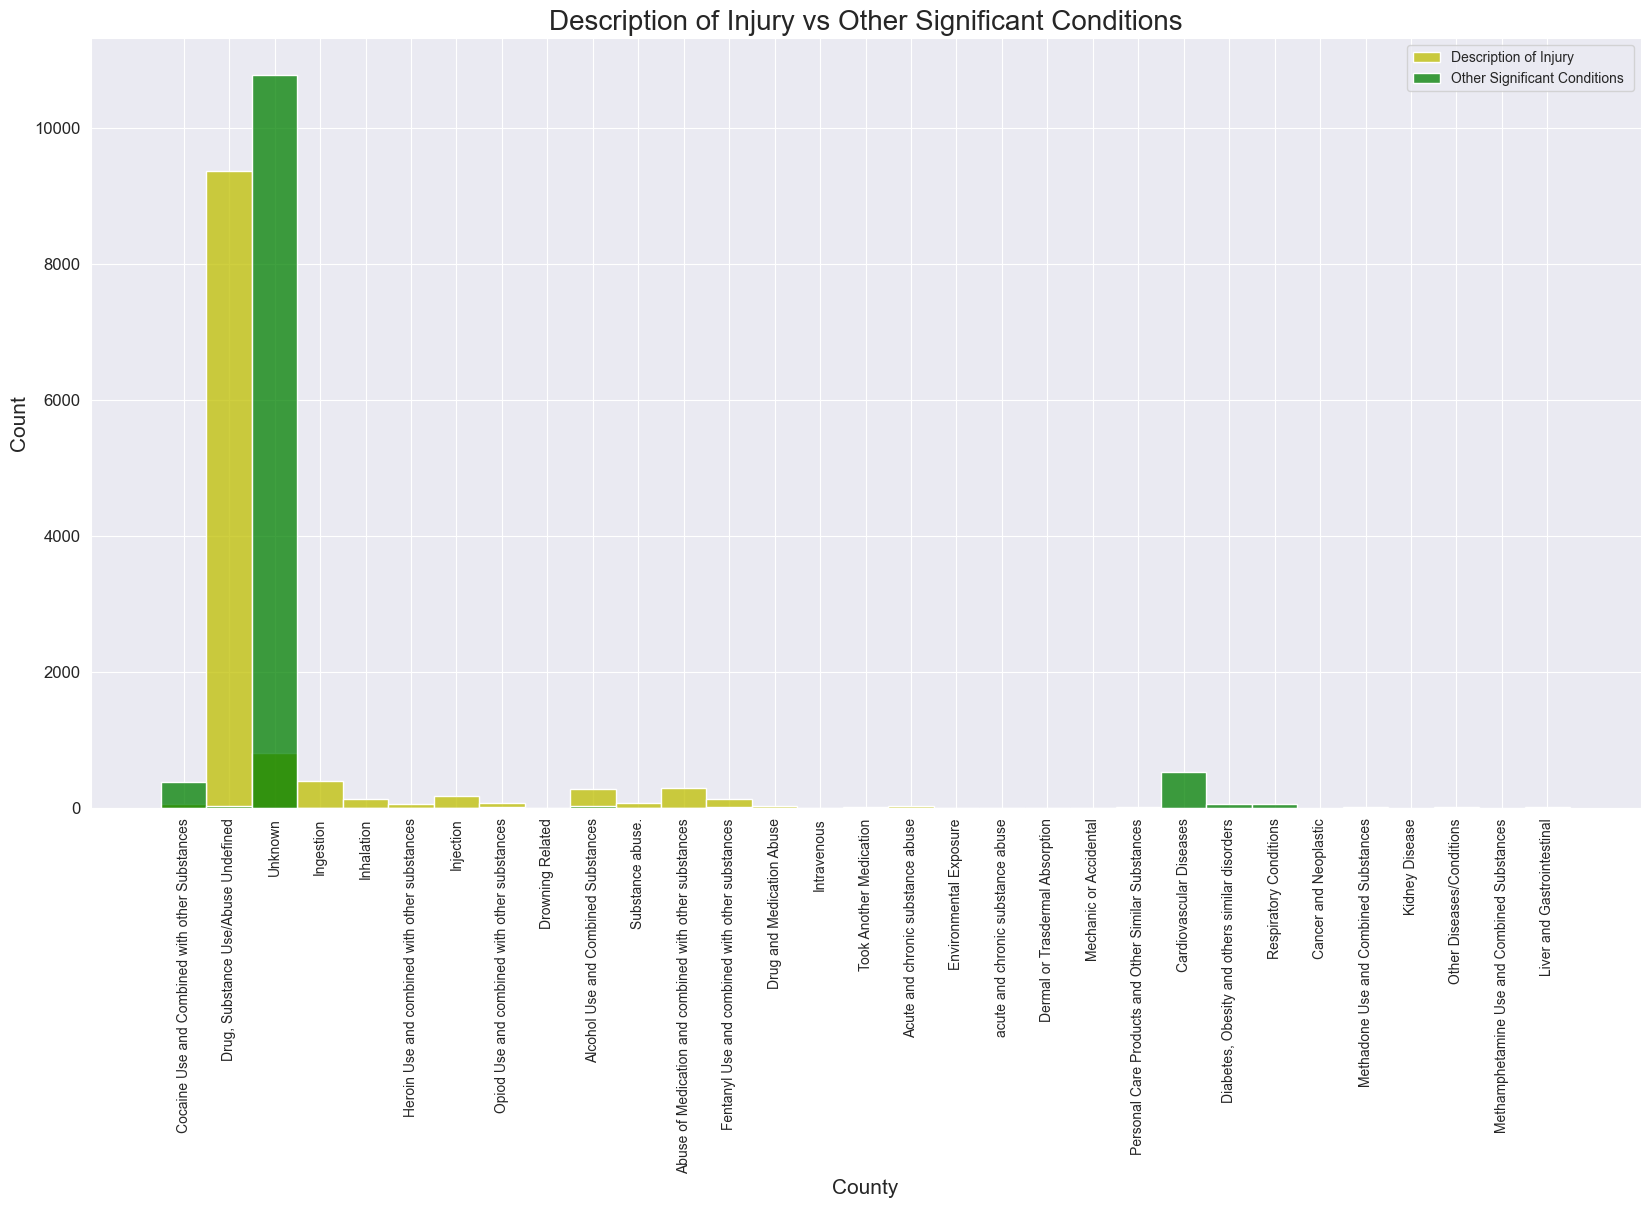

In [22]:
plt.figure(figsize=(20, 10))

data_columns = {'Description of Injury':'y', 'Other Significant Conditions ':'g'}

for col in data_columns:
    data_counts = df[col].value_counts()
    data_ge_20 = data_counts[data_counts >= 6].index
    sns.histplot(data=df[df[col].isin(data_ge_20)], x=col, kde=False, label=col, color=data_columns[col])

plt.title('Description of Injury vs Other Significant Conditions', fontsize=20)
plt.xlabel('County', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=12)
plt.legend()

plt.show()

Despite numerous unknown or undefined records from both columns, if we focus on other x values, we can see other conditions that also affect the decedents, like Cardiovascular Diseases, Ingestion (of something), alcohol combination with other substances, abuse of medication and use of Fentanyl. This columns could be dropped later.

#### COUNT OF INJURY PLACE

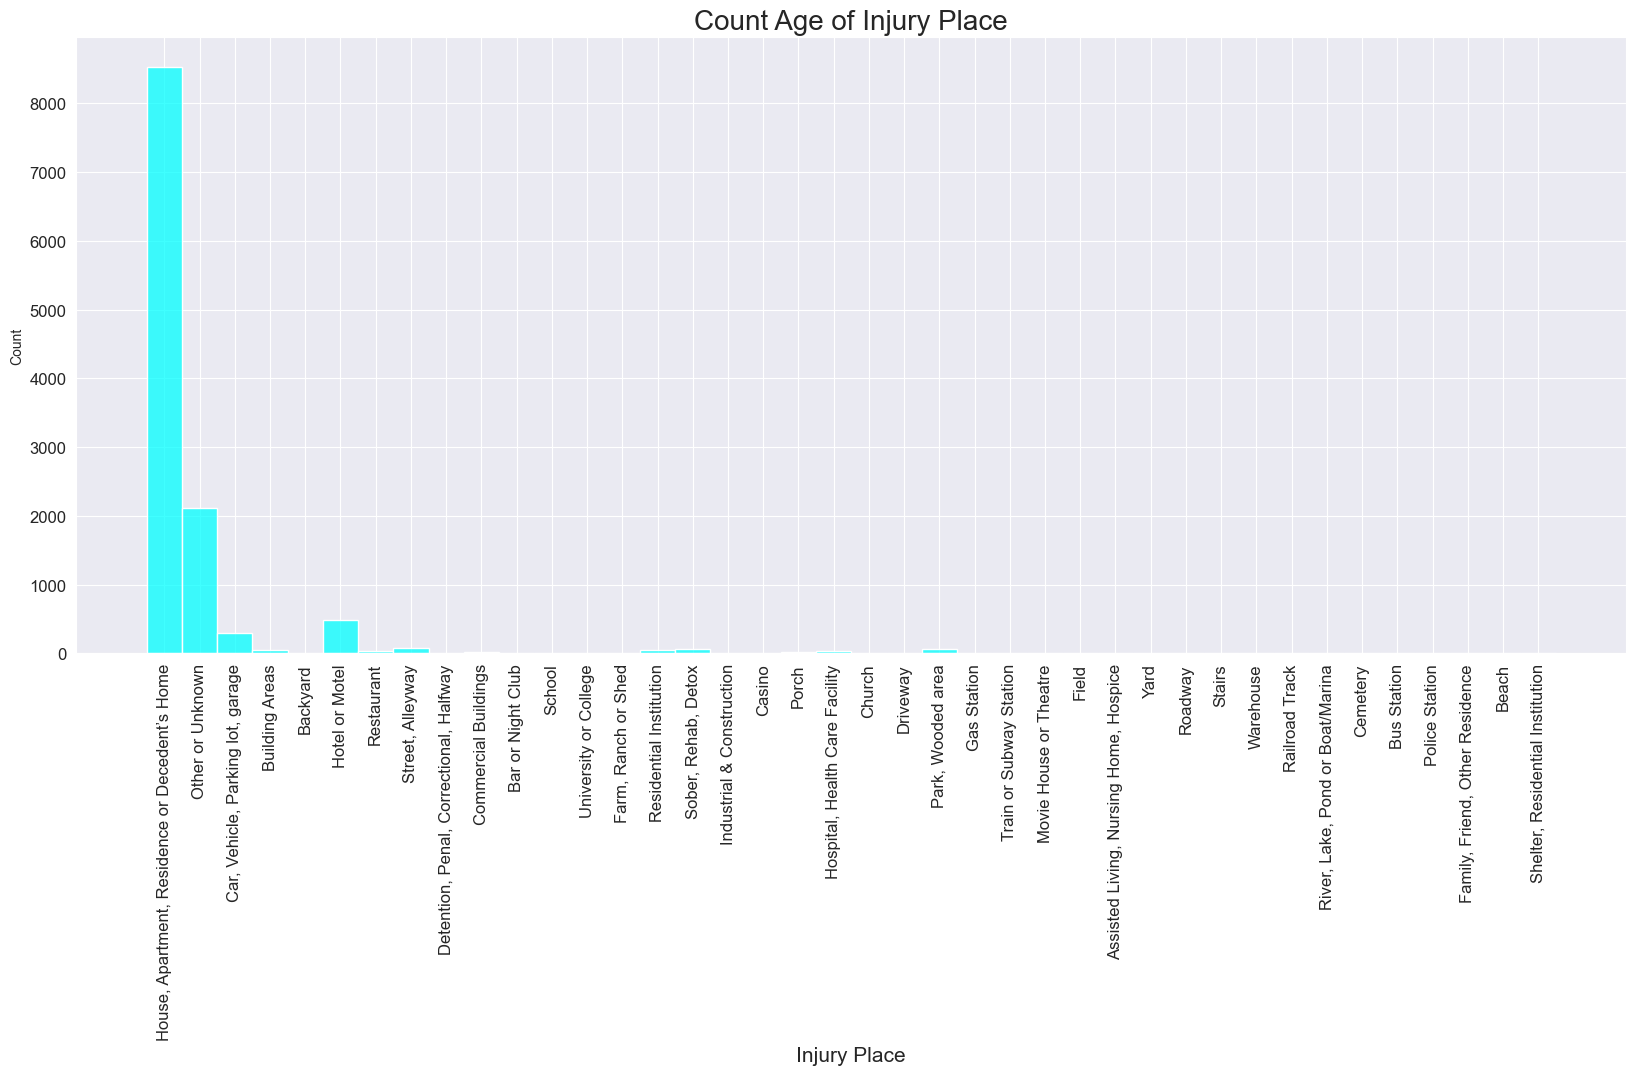

In [23]:
plt.figure(figsize=(20,8))

sns.histplot(data=df, x= 'Injury Place', color = 'aqua')
plt.title("Count Age of Injury Place", fontsize=20)

plt.xlabel("Injury Place", fontsize=15)
plt.xticks(fontsize=12, rotation=90)
plt.yticks(fontsize=12)

plt.show()


They're consuming principally in their houses/homes, followed by other or unknown places, hotel/motel, and out there on the streets/parks. There are cases in Residential Institutions or sober, rehab, and detox houses, which maybe were not accidental, but could be suicidal events. This column could be dropped later

#### COUNT OF INJURY PLACE VS LOCATION

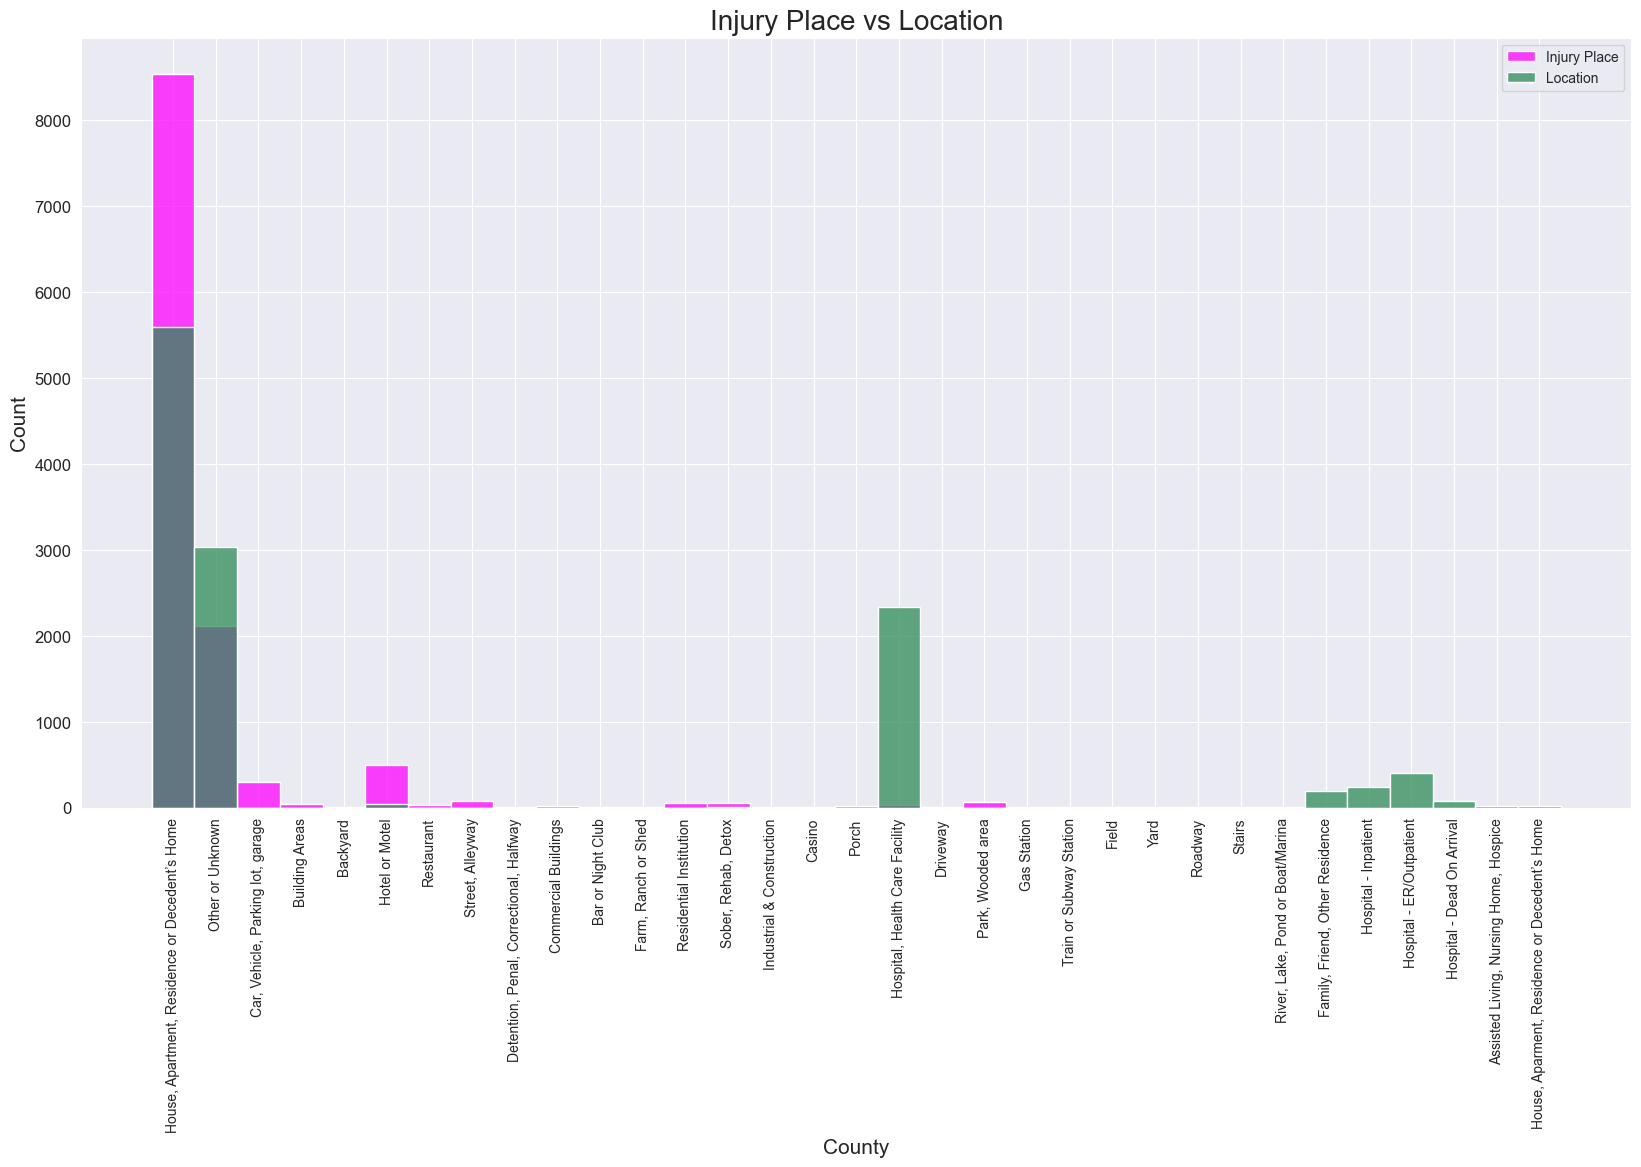

In [24]:
plt.figure(figsize=(20, 10))

place_location_columns = {'Injury Place':'magenta', 'Location':'seagreen'}

for col in place_location_columns:
    place_location_counts = df[col].value_counts()
    place_location_ge_5 = place_location_counts[place_location_counts >=5].index
    sns.histplot(data=df[df[col].isin(place_location_ge_5)], x=col, kde=False, label=col, color=place_location_columns[col])

plt.title('Injury Place vs Location', fontsize=20)
plt.xlabel('County', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=12)
plt.legend()
plt.show()

It is clear that the decedents sustained their injuries principally in their homes or hotels/motels, then they're transferred to a Hospital or Health Care Institution, where they spend some time and then die.

#### SUBSTANCE COLUMNS VISUALIZATION

"Now let's analyze the substance columns. First, we'll examine the presence of individual substances. Second, we'll explore their combinations.

##### SUBSTANCE PRESENCE

In [25]:
substance_column_list= ['Heroin', 'Cocaine', 'Fentanyl', 'Oxycodone', 'Oxymorphone', 'Ethanol','Hydrocodone', 'Benzodiazepine', 'Methadone', 'Meth/Amphetamine',
                   'Amphet', 'Tramad', 'Hydromorphone', 'Morphine (Not Heroin)', 'Xylazine', 'Gabapentin', 'Opiate NOS', 'Heroin/Morph/Codeine']

In [26]:
substance_consolidate_list = []

for substance in substance_column_list:
    for element in df[substance]:
      if element == "Y":
        substance_consolidate_list.append(substance)

substance_consolidate_df = pd.DataFrame(substance_consolidate_list, columns=['Substance'])

substance_consolidate_df.value_counts()


Substance            
Opiate NOS               8868
Fentanyl                 8061
Cocaine                  4578
Heroin                   3578
Ethanol                  3201
Benzodiazepine           2717
Heroin/Morph/Codeine     2202
Xylazine                 1078
Methadone                1078
Oxycodone                1016
Gabapentin                469
Amphet                    431
Tramad                    302
Hydrocodone               169
Oxymorphone               162
Meth/Amphetamine          127
Hydromorphone              77
Morphine (Not Heroin)      59
Name: count, dtype: int64

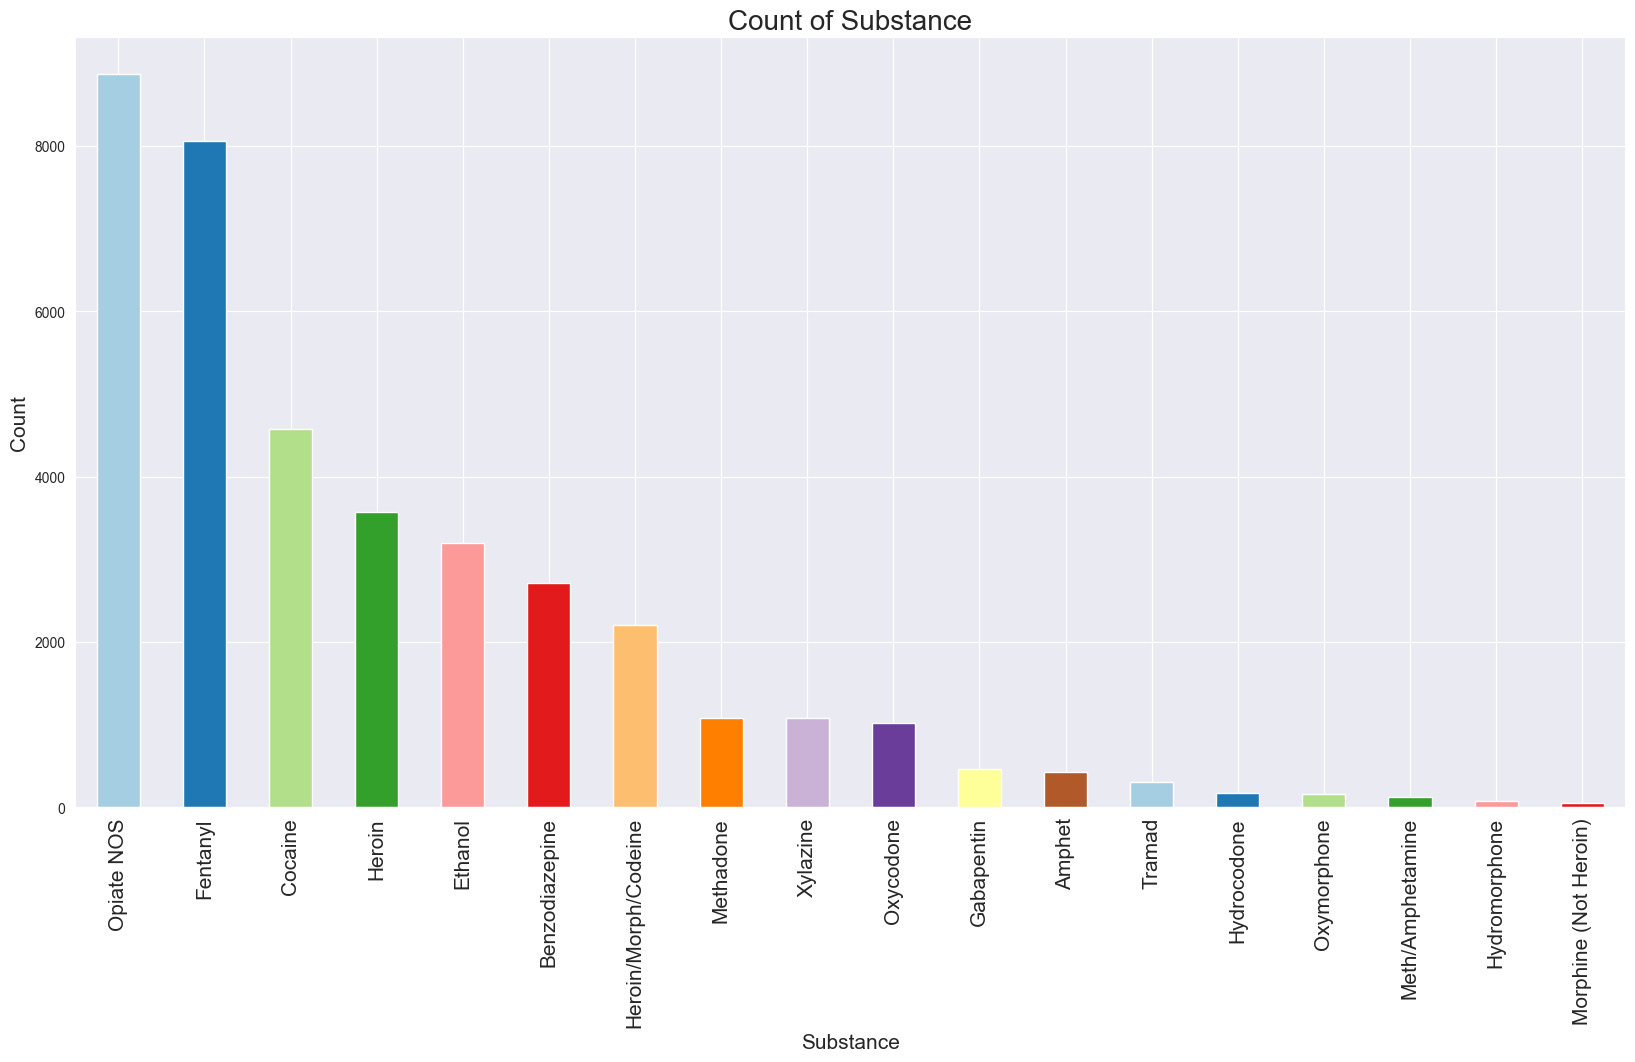

In [27]:
plt.figure(figsize=(20,10))

substance_consolidate_df['Substance'].value_counts().plot(kind='bar', color=colors_arbitrary_1)

plt.title("Count of Substance", fontsize=20)
plt.xlabel("Substance", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.xticks(fontsize=15)

plt.show()

Opiates are the most common substance used. It is a controlled medicine, so their distribution is only by medical prescription and their users could have been while suffering from a harmful pathology. The decedents could be running away from pain and probably they had depression. Illicit opiate consumption also occurred. Fentanyl is a substance that destroys life and society, and has taken away the position of Cocaine, Heroin, and Ethanol. There are other opioid-derived medications that demonstrate the sick condition and the need to calm down the pain.

##### SUBSTANCE COMBINATION

In [28]:
substance_combination_column = [''] * len(df)

i = 0
for index in df.index:
  substance_str = ''
  for substance in substance_column_list:
    if df.loc[index, substance] == 'Y':
      substance_str = substance +"/" + substance_str

  substance_combination_column[i]= substance_str[:-1]
  i +=1

substance_combination_df = pd.DataFrame(substance_combination_column, columns=['Substance_Combination'])

substance_combination_df.value_counts()

Substance_Combination                                               
Opiate NOS/Fentanyl                                                     1116
Opiate NOS/Fentanyl/Cocaine                                             1067
Opiate NOS/Ethanol/Fentanyl                                              525
Cocaine                                                                  454
Opiate NOS/Ethanol/Fentanyl/Cocaine                                      451
                                                                        ... 
Opiate NOS/Gabapentin/Methadone/Benzodiazepine/Fentanyl/Cocaine            1
Opiate NOS/Gabapentin/Methadone/Benzodiazepine/Ethanol/Fentanyl            1
Opiate NOS/Gabapentin/Methadone/Benzodiazepine/Ethanol/Cocaine             1
Opiate NOS/Gabapentin/Hydromorphone/Methadone/Benzodiazepine/Cocaine       1
Xylazine/Cocaine                                                           1
Name: count, Length: 858, dtype: int64

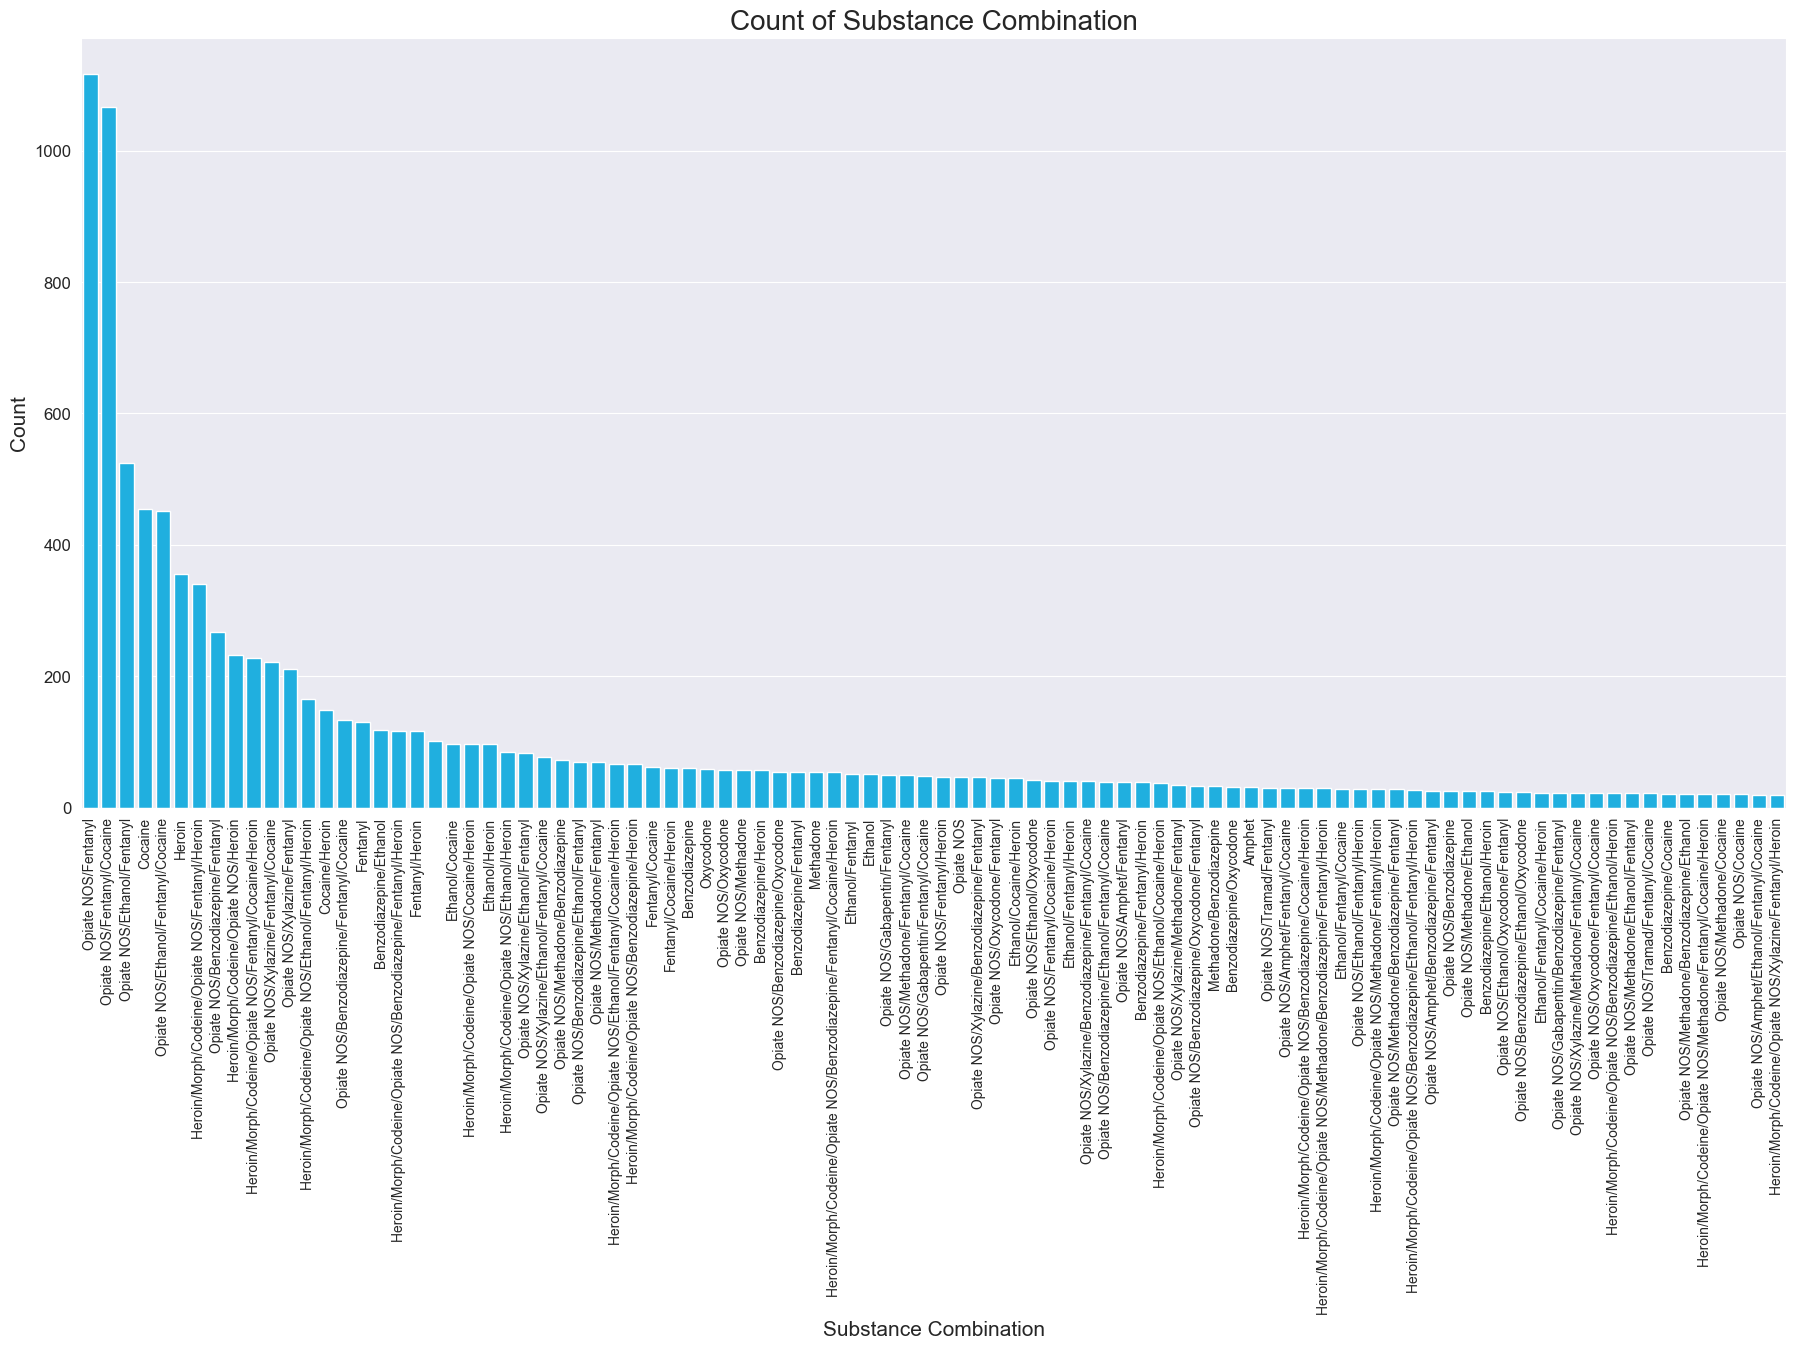

In [29]:
plt.figure(figsize=(22, 10))

substance_combination_counts = substance_combination_df['Substance_Combination'].value_counts().sort_values(ascending=False)
substance_combination_ge_20 = substance_combination_counts[substance_combination_counts >= 20]

sns.barplot(x=substance_combination_ge_20.index,y=substance_combination_ge_20.values, color='deepskyblue')

plt.title('Count of Substance Combination', fontsize=20)
plt.xlabel('Substance Combination', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=12)

plt.show()


There are several records primarily combining opiates and fentanyl, with Cocaine, Ethanol (alcohol) and Heroin as secondary options. Also, there are medication combinations. We conclude that the prevalent combination is Opiates and Fentanyl + Other Substances, and there are other prevalent combinations with Opiates + Other Substance and Fentanyl + Other Substance. In minor proportion, Heroin or Cocaine alone shows fewer records.

#### ACCIDENTAL DEATHS OVER THE YEARS

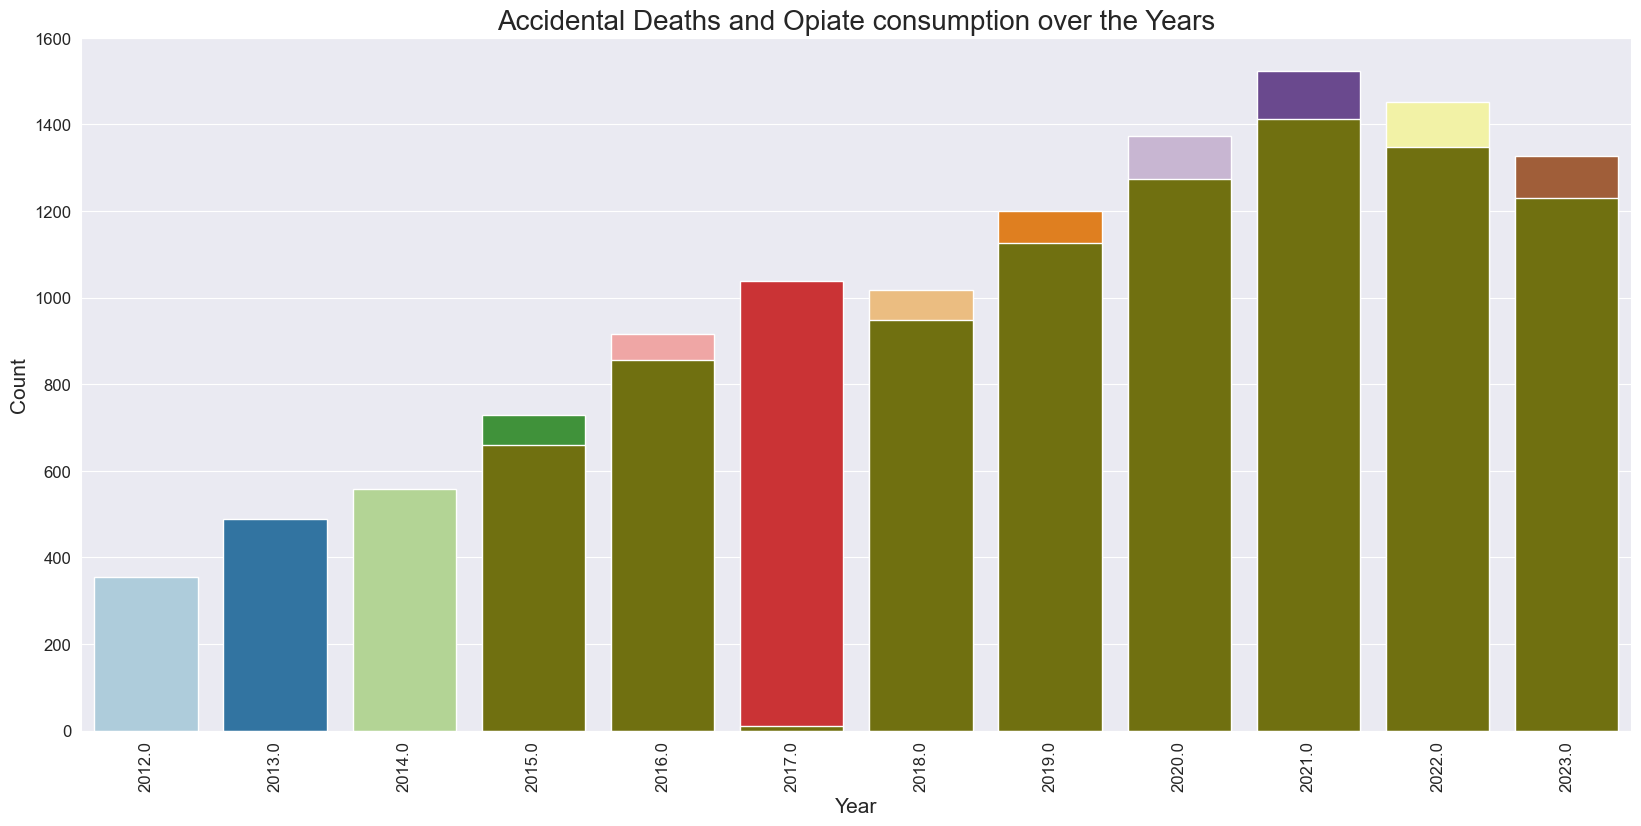

In [30]:
plt.figure(figsize=(20,9))

sns.countplot(data=df, x= "Year", palette= colors_arbitrary_1)
df_opiat_yes = df[df['Opiate NOS']=='Y']

sns.countplot(data=df_opiat_yes, x= "Year", color = 'olive')

plt.title("Accidental Deaths and Opiate consumption over the Years", fontsize=20)

plt.xlabel("Year", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.xticks(fontsize=12, rotation = 90)
plt.yticks(fontsize=12)

plt.show()

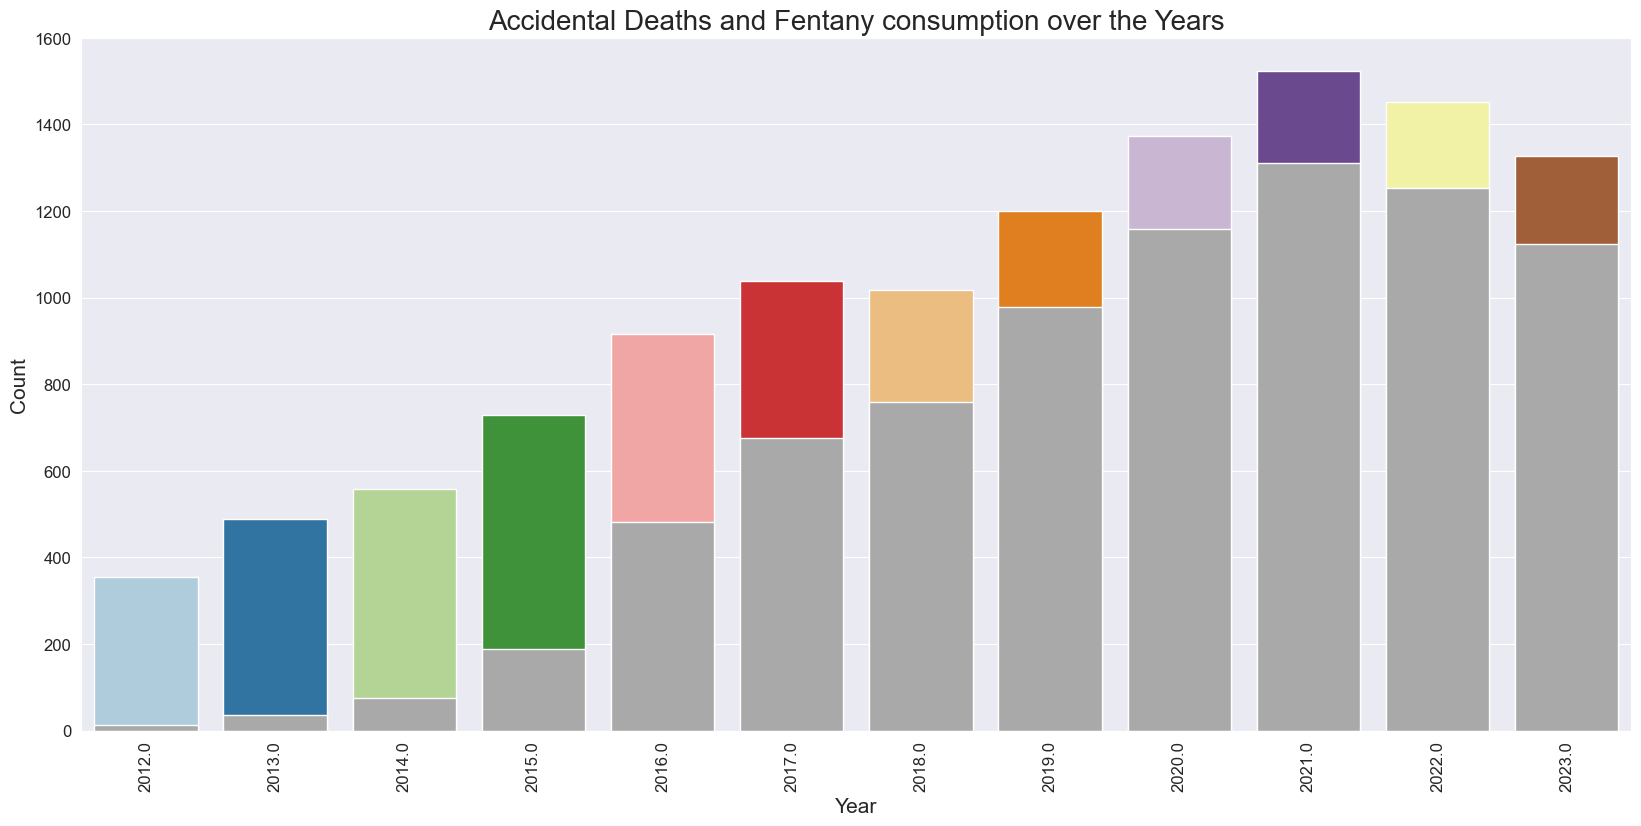

In [31]:
plt.figure(figsize=(20,9))

sns.countplot(data=df, x= "Year", palette= colors_arbitrary_1)
df_fent_yes = df[df['Fentanyl']=='Y']

sns.countplot(data=df_fent_yes, x= "Year", color = 'darkgray')

plt.title("Accidental Deaths and Fentany consumption over the Years", fontsize=20)

plt.xlabel("Year", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.xticks(fontsize=12, rotation = 90)
plt.yticks(fontsize=12)

plt.show()

In [32]:
df['Year'].value_counts().max()/df['Year'].value_counts().min()*100

429.2957746478873

Over the years, accidental deaths have increased and there is a peak in 2021, one year after the pandemic started. There is a serious and complex public health problem: Fentanyl adulteration, widespread opioid ilegal consumption, and mental diseases caused by people not finding any reason to live. Possibly, these deaths are not accidental; they could be suicidal tendencies Over the past ten years, "accidental" deaths have increased by 429%. While Opiate Fentanyl use (shown pink in grey, respectively) has increased, accidental deaths have also risen, showing a direct correlation.

In 2017, there was a drastic drop in opioid prescription and consumption, but in the following years the users turned to illicit opioids. We have a major issue with opioids and their synthetic imitations like Fentanyl.

#### ACCIDENTAL DEATHS OVER THE MONTHS

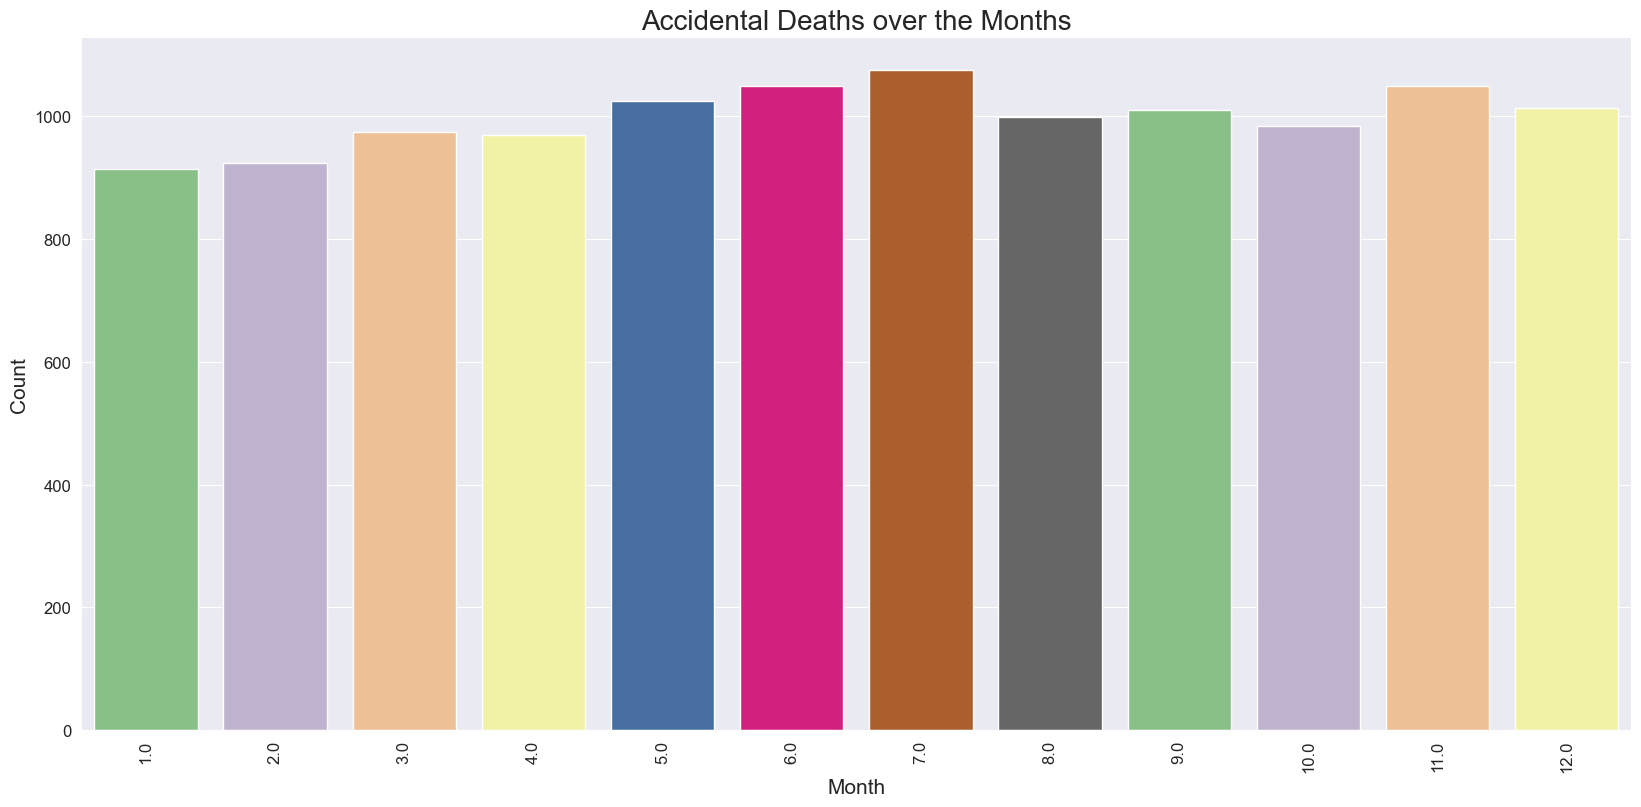

In [33]:
plt.figure(figsize=(20,9))

sns.countplot(data=df, x= "Month", palette = 'Accent')
plt.title("Accidental Deaths over the Months", fontsize=20)

plt.xlabel("Month", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.xticks(fontsize=12, rotation = 90)
plt.yticks(fontsize=12)

plt.show()

Not much variation except in July and November, but it's not significant. We can drop this column later.

#### ACCIDENTAL DEATHS OVER THE DAYS OF MONTH

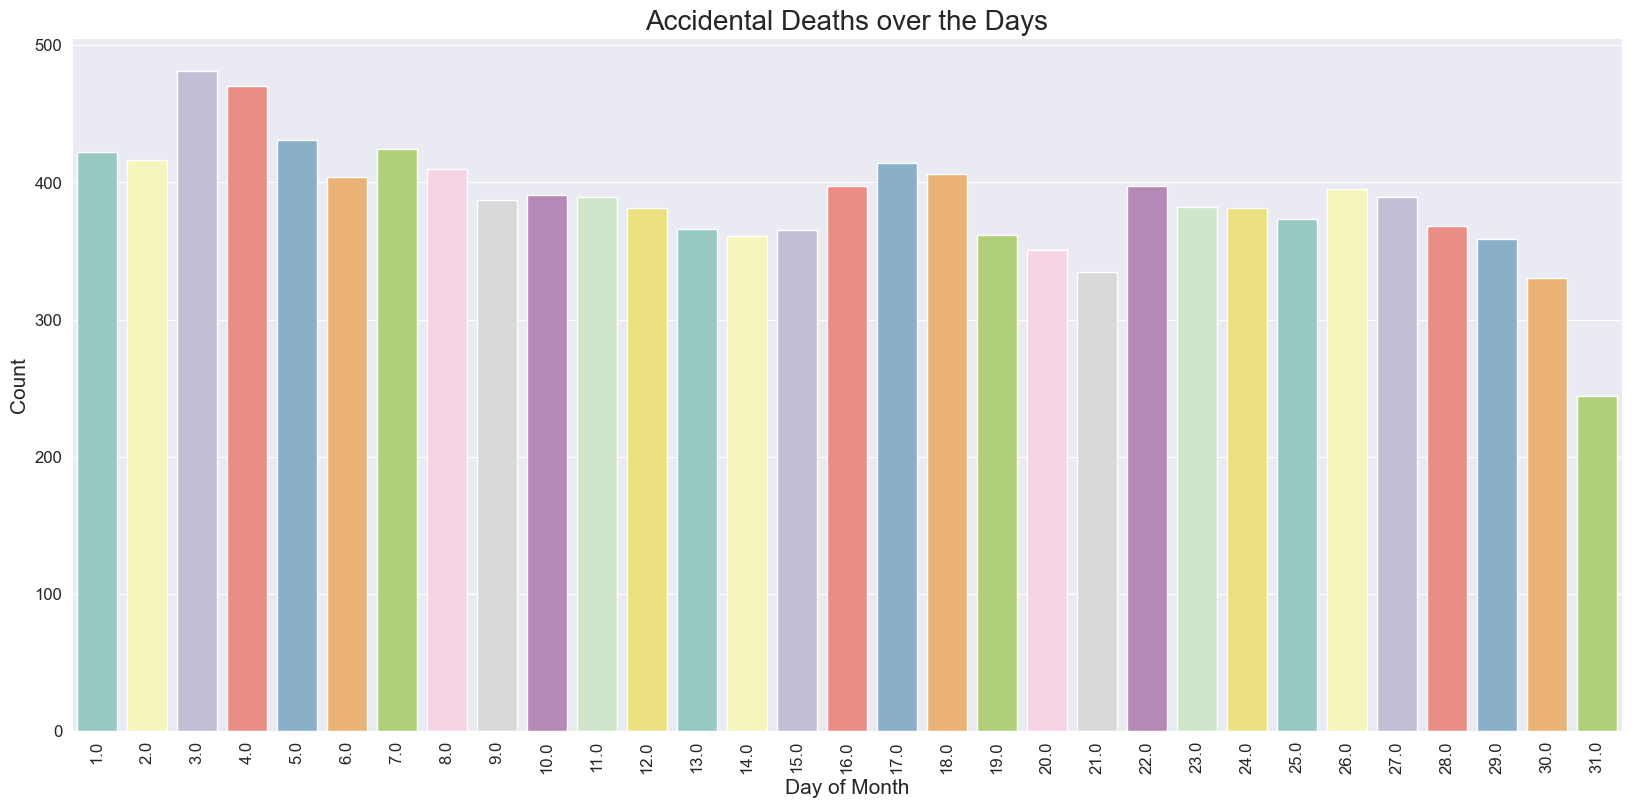

In [34]:
plt.figure(figsize=(20,9))

sns.countplot(data=df, x= "Day", palette = 'Set3')
plt.title("Accidental Deaths over the Days", fontsize=20)

plt.xlabel("Day of Month", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.xticks(fontsize=12, rotation = 90)
plt.yticks(fontsize=12)

plt.show()

When the month begins, consumption increases. Maybe this happens because during these days there is incoming money and medication transactions.

### INTERACTIVE MAP VISUALIZATION

Let’s see the cases localization on the map; we could find some features from this visualization

If all data is included, the system will collapse, so we have to extract some data for the visualization and drop NaN values:

In [35]:
df_map_vis= df[['Resid_City_Coord_Lat', 'Resid_City_Coord_Lon','Injury_City_Coord_Lat',
            'Injury_City_Coord_Lon','Death_City_Coord_Lat', 'Death_City_Coord_Lon']].sample(1500).reset_index(drop=True)

In [36]:
df_map_vis.isna().sum()

Resid_City_Coord_Lat     16
Resid_City_Coord_Lon     16
Injury_City_Coord_Lat    25
Injury_City_Coord_Lon    25
Death_City_Coord_Lat      0
Death_City_Coord_Lon      0
dtype: int64

In [37]:
df_map_vis.dropna(axis= 0, inplace = True)

#### RESIDENCE CITY VISUALIZATION

In [38]:
connect_map=folium.Map(location=[41.599998, -72.699997], zoom_start=4)

ubication_map= folium.map.FeatureGroup()

for lat,lon in zip(df_map_vis['Resid_City_Coord_Lat'], df_map_vis['Resid_City_Coord_Lon']):
  folium.Marker([lat,lon]).add_to(connect_map)

connect_map.add_child(ubication_map)

connect_map

Not only Connecticut residents are affected, but also travelers who died accidentally.

#### INJURY CITY AND DEATH CITY VISUALIZATION

In [39]:
connect_map=folium.Map(location=[41.599998, -72.699997], zoom_start=9)

ubication_map= folium.map.FeatureGroup()

for lat,lon in zip(df_map_vis['Injury_City_Coord_Lat'], df_map_vis['Injury_City_Coord_Lon']):
  folium.Marker([lat,lon]).add_to(connect_map)

connect_map.add_child(ubication_map)

connect_map

In [40]:
connect_map=folium.Map(location=[41.599998, -72.699997], zoom_start=9)

ubication_map= folium.map.FeatureGroup()

for lat,lon in zip(df_map_vis['Death_City_Coord_Lat'], df_map_vis['Death_City_Coord_Lon']):
  folium.Marker([lat,lon]).add_to(connect_map)

connect_map.add_child(ubication_map)

connect_map

There are a few city transfers. The special health conditions and available time enable these transfers, but they are minimal.

### CLEAN COLUMNS FOR ML MODELING

Finally, after analysis, we can determine the columns that don't add value and we can drop them to create a dataframe for subsequent ML modeling:

In [41]:
df_to_ml = df.drop(columns= ['Race', 'Date Type','Ethnicity','Residence City','Residence State', 'Injury State', 'Description of Injury', 'Injury Place',
                             'Other Significant Conditions ','Year', 'Month'])

Let's see the final dataset:

In [42]:
df_to_ml.sample(3)

,Age,Sex,Residence County,Injury City,Injury County,Death City,Death County,Location,Heroin,Cocaine,Fentanyl,Oxycodone,Oxymorphone,Ethanol,Hydrocodone,Benzodiazepine,Methadone,Meth/Amphetamine,Amphet,Tramad,Hydromorphone,Morphine (Not Heroin),Xylazine,Gabapentin,Opiate NOS,Heroin/Morph/Codeine,Day,Resid_City_Coord_Lat,Resid_City_Coord_Lon,Injury_City_Coord_Lat,Injury_City_Coord_Lon,Death_City_Coord_Lat,Death_City_Coord_Lon
10102,40.0,Male,NEW HAVEN,NEW HAVEN,NEW HAVEN,UNKNOWN,UNKNOWN,Other or Unknown,N,Y,Y,N,N,Y,N,N,N,N,Y,N,N,N,Y,N,Y,N,17.0,41.393450,-72.857930,41.308010,-72.924320,41.573503,-72.738306
11266,65.0,Female,HARTFORD,WETHERSFIELD,HARTFORD,UNKNOWN,UNKNOWN,Other or Unknown,Y,Y,Y,N,N,N,N,N,Y,N,N,N,N,N,N,N,Y,Y,17.0,41.712487,-72.663607,41.712487,-72.663607,41.573503,-72.738306
5449,36.0,Male,SUFFOLK,SHELTON,FAIRFIELD,DERBY,NEW HAVEN,Hospital - Dead On Arrival,N,Y,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,18.0,NaN,NaN,41.316843,-73.092968,41.322959,-73.089594


Let's save the dataset:

In [43]:
project_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
data_dir = os.path.join(project_dir, "data", "processed")
os.makedirs(data_dir, exist_ok=True)

output_path = os.path.join(data_dir, "df_to_ml.csv")
df_to_ml.to_csv(output_path, index=False)